Replication, Out-of-sample, and robust test all in one notebook

Tale of 2 Days Replication (1964 - 2011):

In [2]:
import pandas as pd
from datetime import datetime

In [3]:
# read daily riskfree file
ff_daily = pd.read_csv('ff_daily.csv', parse_dates=['caldt'])
ff_daily = ff_daily.rename(columns={'Mkt-RF':'exmkt'})
ff_daily['exmkt'] = ff_daily['exmkt']*.01
ff_daily['SMB'] = ff_daily['SMB']*.01
ff_daily['HML'] = ff_daily['HML']*.01
ff_daily['RF'] = ff_daily['RF']*.01
ff_daily

,caldt,exmkt,SMB,HML,RF
0,1926-07-01,0.0010,-0.0024,-0.0028,0.00009
1,1926-07-02,0.0045,-0.0032,-0.0008,0.00009
2,1926-07-06,0.0017,0.0027,-0.0035,0.00009
3,1926-07-07,0.0009,-0.0059,0.0003,0.00009
4,1926-07-08,0.0021,-0.0036,0.0015,0.00009
...,...,...,...,...,...
24849,2020-10-26,-0.0185,-0.0027,-0.0040,0.00000
24850,2020-10-27,-0.0023,-0.0004,-0.0238,0.00000
24851,2020-10-28,-0.0342,0.0006,0.0055,0.00000
24852,2020-10-29,0.0113,0.0016,0.0023,0.00000


In [4]:
# read daily stock file, merge ff_daily
dstk = pd.read_csv('dstk.csv', parse_dates=['caldt'])
dstk = dstk.sort_values(by='caldt')
dstk = dstk.reset_index(drop=True)
dstk['month'] = dstk['caldt'].dt.to_period('M')
dstk = dstk.merge(ff_daily, on='caldt',how='left')
dstk

,permno,caldt,shrcd,excd,siccd,prc,ret,vol,shr,month,exmkt,SMB,HML,RF
0,10751,1925-12-31,10,1,3710.0,74.7500,NaN,100.0,80.0,1925-12,NaN,NaN,NaN,NaN
1,12992,1925-12-31,10,1,2210.0,25.0000,NaN,3800.0,200.0,1925-12,NaN,NaN,NaN,NaN
2,12095,1925-12-31,11,1,3660.0,77.8750,NaN,10700.0,325.0,1925-12,NaN,NaN,NaN,NaN
3,11148,1925-12-31,10,1,4000.0,160.0000,NaN,5200.0,425.0,1925-12,NaN,NaN,NaN,NaN
4,10655,1925-12-31,10,1,2250.0,0.7500,NaN,200.0,100.0,1925-12,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26749551,12660,2019-12-31,11,1,5999.0,2.7000,0.011236,574272.0,84565.0,2019-12,0.0028,-0.0001,0.0013,0.00007
26749552,11018,2019-12-31,11,1,6022.0,10.5900,-0.000943,997592.0,217359.0,2019-12,0.0028,-0.0001,0.0013,0.00007
26749553,20598,2019-12-31,11,3,250.0,42.7500,0.008493,313383.0,43893.0,2019-12,0.0028,-0.0001,0.0013,0.00007
26749554,15222,2019-12-31,11,3,4731.0,27.6800,0.003262,993385.0,126195.0,2019-12,0.0028,-0.0001,0.0013,0.00007


In [5]:
dstk = dstk.query("ret == ret").reset_index(drop=True)
dstk = dstk.query("RF == RF").reset_index(drop=True)
dstk['exret'] = dstk['ret'] - dstk['RF']
dstk

,permno,caldt,shrcd,excd,siccd,prc,ret,vol,shr,month,exmkt,SMB,HML,RF,exret
0,10559,1926-07-01,10,1,5310.0,41.7500,-0.005952,500.0,599.0,1926-07,0.0010,-0.0024,-0.0028,0.00009,-0.006042
1,15560,1926-07-01,11,1,3110.0,8.1250,-0.084507,200.0,113.0,1926-07,0.0010,-0.0024,-0.0028,0.00009,-0.084597
2,12378,1926-07-01,10,1,3710.0,51.0000,0.000000,14300.0,1596.0,1926-07,0.0010,-0.0024,-0.0028,0.00009,-0.000090
3,10874,1926-07-01,11,1,3940.0,25.6250,-0.014423,200.0,500.0,1926-07,0.0010,-0.0024,-0.0028,0.00009,-0.014513
4,12474,1926-07-01,10,1,4110.0,43.1250,-0.014286,4600.0,350.0,1926-07,0.0010,-0.0024,-0.0028,0.00009,-0.014376
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26301585,12660,2019-12-31,11,1,5999.0,2.7000,0.011236,574272.0,84565.0,2019-12,0.0028,-0.0001,0.0013,0.00007,0.011166
26301586,11018,2019-12-31,11,1,6022.0,10.5900,-0.000943,997592.0,217359.0,2019-12,0.0028,-0.0001,0.0013,0.00007,-0.001013
26301587,20598,2019-12-31,11,3,250.0,42.7500,0.008493,313383.0,43893.0,2019-12,0.0028,-0.0001,0.0013,0.00007,0.008423
26301588,15222,2019-12-31,11,3,4731.0,27.6800,0.003262,993385.0,126195.0,2019-12,0.0028,-0.0001,0.0013,0.00007,0.003192


In [6]:
import finance_byu.rolling as rolling
dstk = dstk.sort_values(by=['permno','caldt'])
dstk = dstk.reset_index(drop=True)
dstk['nobs'] = dstk.groupby('permno')['ret'].transform('count')
# dstk.query("nobs>=250")
dstk1 = dstk[dstk['nobs'] >=250]
dstk1 = dstk1.sort_values(by=['permno','caldt'])
dstk1 = dstk1.reset_index(drop=True)
dstk1['beta'] = dstk1.groupby('permno')[['exret','exmkt']].apply(lambda x: rolling.roll_beta(x['exret'],x['exmkt'],250,250))
dstk1

,permno,caldt,shrcd,excd,siccd,prc,ret,vol,shr,month,exmkt,SMB,HML,RF,exret,nobs,beta
0,10000,1986-01-08,10,3,3990.0,-2.500,-0.024390,12800.0,3680.0,1986-01,-0.0216,0.0140,0.0030,0.00025,-0.024640,361,NaN
1,10000,1986-01-09,10,3,3990.0,-2.500,0.000000,1400.0,3680.0,1986-01,-0.0117,-0.0077,-0.0014,0.00025,-0.000250,361,NaN
2,10000,1986-01-10,10,3,3990.0,-2.500,0.000000,8500.0,3680.0,1986-01,-0.0002,0.0019,0.0026,0.00025,-0.000250,361,NaN
3,10000,1986-01-13,10,3,3990.0,-2.625,0.050000,5450.0,3680.0,1986-01,0.0028,-0.0004,0.0028,0.00025,0.049750,361,NaN
4,10000,1986-01-14,10,3,3990.0,-2.750,0.047619,2075.0,3680.0,1986-01,0.0001,0.0044,-0.0001,0.00025,0.047369,361,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26182992,24934,1958-01-24,10,1,7830.0,8.125,0.000000,500.0,2699.0,1958-01,0.0087,-0.0013,0.0031,0.00013,-0.000130,1349,0.481469
26182993,24934,1958-01-27,10,1,7830.0,8.125,0.000000,3000.0,2699.0,1958-01,-0.0022,-0.0009,0.0055,0.00013,-0.000130,1349,0.481581
26182994,24934,1958-01-28,10,1,7830.0,8.125,0.000000,900.0,2699.0,1958-01,0.0003,-0.0001,-0.0027,0.00013,-0.000130,1349,0.487381
26182995,24934,1958-01-29,10,1,7830.0,8.250,0.015385,500.0,2699.0,1958-01,0.0057,-0.0032,0.0029,0.00013,0.015255,1349,0.494116


In [7]:
# get last beta value for each month/stock
dstk2 = dstk1.copy()
dstk2 = dstk2.sort_values(by=['permno','caldt'])
dstk2 = dstk2.reset_index(drop=True)
temp = dstk2.groupby(['permno','month'])['beta'].apply(lambda x: x.iloc[-1])
temp = temp.reset_index(level=[0,1])
temp

,permno,month,beta
0,10000,1986-01,NaN
1,10000,1986-02,NaN
2,10000,1986-03,NaN
3,10000,1986-04,NaN
4,10000,1986-05,NaN
...,...,...,...
1215172,24934,1957-09,0.386411
1215173,24934,1957-10,0.478972
1215174,24934,1957-11,0.481511
1215175,24934,1957-12,0.477908


In [8]:
# sort by decile, lag port assignment one month, then merge back in
temp = temp.sort_values(by=['permno','month'])
temp = temp.reset_index(drop=True)
temp['port'] = temp.groupby('month')['beta'].transform(pd.qcut,10,labels=False,duplicates='drop')
temp['port'] = temp.groupby('permno')['port'].shift()
del temp['beta']
temp

,permno,month,port
0,10000,1986-01,NaN
1,10000,1986-02,NaN
2,10000,1986-03,NaN
3,10000,1986-04,NaN
4,10000,1986-05,NaN
...,...,...,...
1215172,24934,1957-09,3.0
1215173,24934,1957-10,2.0
1215174,24934,1957-11,2.0
1215175,24934,1957-12,2.0


In [9]:
dstk2 = dstk1.merge(temp,on=['permno','month'],how='left')
dstk2

,permno,caldt,shrcd,excd,siccd,prc,ret,vol,shr,month,exmkt,SMB,HML,RF,exret,nobs,beta,port
0,10000,1986-01-08,10,3,3990.0,-2.500,-0.024390,12800.0,3680.0,1986-01,-0.0216,0.0140,0.0030,0.00025,-0.024640,361,NaN,NaN
1,10000,1986-01-09,10,3,3990.0,-2.500,0.000000,1400.0,3680.0,1986-01,-0.0117,-0.0077,-0.0014,0.00025,-0.000250,361,NaN,NaN
2,10000,1986-01-10,10,3,3990.0,-2.500,0.000000,8500.0,3680.0,1986-01,-0.0002,0.0019,0.0026,0.00025,-0.000250,361,NaN,NaN
3,10000,1986-01-13,10,3,3990.0,-2.625,0.050000,5450.0,3680.0,1986-01,0.0028,-0.0004,0.0028,0.00025,0.049750,361,NaN,NaN
4,10000,1986-01-14,10,3,3990.0,-2.750,0.047619,2075.0,3680.0,1986-01,0.0001,0.0044,-0.0001,0.00025,0.047369,361,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26182992,24934,1958-01-24,10,1,7830.0,8.125,0.000000,500.0,2699.0,1958-01,0.0087,-0.0013,0.0031,0.00013,-0.000130,1349,0.481469,2.0
26182993,24934,1958-01-27,10,1,7830.0,8.125,0.000000,3000.0,2699.0,1958-01,-0.0022,-0.0009,0.0055,0.00013,-0.000130,1349,0.481581,2.0
26182994,24934,1958-01-28,10,1,7830.0,8.125,0.000000,900.0,2699.0,1958-01,0.0003,-0.0001,-0.0027,0.00013,-0.000130,1349,0.487381,2.0
26182995,24934,1958-01-29,10,1,7830.0,8.250,0.015385,500.0,2699.0,1958-01,0.0057,-0.0032,0.0029,0.00013,0.015255,1349,0.494116,2.0


In [10]:
# get returns for value-weighted beta-decile portfolios
dstk2['me'] = abs(dstk2['prc'])*dstk2['shr']
dstk2 = dstk2.sort_values(by=['permno','caldt'])
dstk2 = dstk2.reset_index(drop=True)
dstk2['melag'] = dstk2.groupby('permno')['me'].shift()
dstk2['rme'] = dstk2['melag']*dstk2['ret']

vw = dstk2.pivot_table('rme','caldt',columns='port',aggfunc='sum')
vw = vw/dstk2.pivot_table('melag','caldt',columns='port',aggfunc='sum')

vw.head(5)

port,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
caldt,,,,,,,,,,
1927-06-01,0.007302,0.002420,-0.000682,0.002441,0.001647,0.004005,-0.001443,0.004726,0.005076,0.008153
1927-06-02,-0.004016,0.002736,0.005775,-0.000211,-0.000874,0.000813,-0.000226,0.002319,-0.000386,0.003610
1927-06-03,0.007835,-0.004505,-0.005852,-0.008094,-0.012784,-0.006528,-0.008935,-0.012928,-0.012458,-0.013730
1927-06-04,0.001531,0.000654,0.002041,0.001485,0.004633,0.004967,0.003828,0.005748,0.005647,0.009123
1927-06-06,0.001252,0.002488,0.001065,0.001994,0.008512,0.005122,0.005565,0.005061,0.005369,0.011273


In [11]:
vw.describe()

port,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
count,24369.000000,24369.000000,24369.000000,24369.000000,24369.000000,24369.000000,24369.000000,24369.000000,24369.000000,24369.000000
mean,0.000350,0.000426,0.000373,0.000407,0.000411,0.000443,0.000468,0.000450,0.000487,0.000483
std,0.012779,0.007473,0.007875,0.008825,0.009569,0.010882,0.012216,0.013554,0.015659,0.019651
min,-0.477717,-0.117078,-0.132800,-0.145685,-0.116913,-0.123633,-0.165122,-0.160480,-0.210886,-0.195645
25%,-0.002472,-0.002452,-0.002776,-0.003045,-0.003558,-0.004014,-0.004639,-0.005272,-0.006176,-0.008148
50%,0.000386,0.000569,0.000520,0.000657,0.000640,0.000673,0.000663,0.000603,0.000645,0.000596
75%,0.003135,0.003504,0.003676,0.004128,0.004657,0.005166,0.005861,0.006399,0.007327,0.009332
max,1.014417,0.123925,0.105615,0.192133,0.161893,0.166338,0.156237,0.174012,0.222346,0.266765


In [12]:
vw = vw.merge(ff_daily,on='caldt',how='left')
vw

,caldt,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,exmkt,SMB,HML,RF
0,1927-06-01,0.007302,0.002420,-0.000682,0.002441,0.001647,0.004005,-0.001443,0.004726,0.005076,0.008153,0.0032,-0.0007,0.0024,0.00010
1,1927-06-02,-0.004016,0.002736,0.005775,-0.000211,-0.000874,0.000813,-0.000226,0.002319,-0.000386,0.003610,0.0008,-0.0009,0.0026,0.00010
2,1927-06-03,0.007835,-0.004505,-0.005852,-0.008094,-0.012784,-0.006528,-0.008935,-0.012928,-0.012458,-0.013730,-0.0088,0.0019,-0.0066,0.00010
3,1927-06-04,0.001531,0.000654,0.002041,0.001485,0.004633,0.004967,0.003828,0.005748,0.005647,0.009123,0.0043,0.0012,0.0020,0.00010
4,1927-06-06,0.001252,0.002488,0.001065,0.001994,0.008512,0.005122,0.005565,0.005061,0.005369,0.011273,0.0051,0.0019,0.0120,0.00010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24364,2019-12-24,0.007045,0.000887,0.000013,-0.002320,-0.000698,-0.000856,-0.000241,-0.003485,-0.000041,0.004742,0.0001,0.0037,-0.0002,0.00007
24365,2019-12-26,0.005403,0.001166,0.001327,0.001625,0.003747,0.002570,0.001045,0.003986,0.010039,0.003878,0.0048,-0.0053,-0.0001,0.00007
24366,2019-12-27,-0.002951,0.003100,0.004883,0.000330,-0.001055,-0.001663,-0.000103,-0.002510,-0.000588,-0.008258,-0.0010,-0.0052,-0.0007,0.00007
24367,2019-12-30,0.005572,-0.001284,-0.004392,-0.002879,-0.003664,-0.004842,-0.007438,-0.007009,-0.005150,-0.014127,-0.0057,0.0017,0.0060,0.00007


In [13]:
vw = vw.rename(columns={0:'port_0',1:'port_1',2:'port_2',3:'port_3',4:'port_4',5:'port_5',6:'port_6',7:'port_7',8:'port_8',9:'port_9'})
names = ['port_0','port_1','port_2','port_3','port_4','port_5','port_6','port_7','port_8','port_9']
names1 = ['exret_0','exret_1','exret_2','exret_3','exret_4','exret_5','exret_6','exret_7','exret_8','exret_9']
vw[names1] = vw[names].sub(vw['RF'], axis=0)
vw

,caldt,port_0,port_1,port_2,port_3,port_4,port_5,port_6,port_7,port_8,...,exret_0,exret_1,exret_2,exret_3,exret_4,exret_5,exret_6,exret_7,exret_8,exret_9
0,1927-06-01,0.007302,0.002420,-0.000682,0.002441,0.001647,0.004005,-0.001443,0.004726,0.005076,...,0.007202,0.002320,-0.000782,0.002341,0.001547,0.003905,-0.001543,0.004626,0.004976,0.008053
1,1927-06-02,-0.004016,0.002736,0.005775,-0.000211,-0.000874,0.000813,-0.000226,0.002319,-0.000386,...,-0.004116,0.002636,0.005675,-0.000311,-0.000974,0.000713,-0.000326,0.002219,-0.000486,0.003510
2,1927-06-03,0.007835,-0.004505,-0.005852,-0.008094,-0.012784,-0.006528,-0.008935,-0.012928,-0.012458,...,0.007735,-0.004605,-0.005952,-0.008194,-0.012884,-0.006628,-0.009035,-0.013028,-0.012558,-0.013830
3,1927-06-04,0.001531,0.000654,0.002041,0.001485,0.004633,0.004967,0.003828,0.005748,0.005647,...,0.001431,0.000554,0.001941,0.001385,0.004533,0.004867,0.003728,0.005648,0.005547,0.009023
4,1927-06-06,0.001252,0.002488,0.001065,0.001994,0.008512,0.005122,0.005565,0.005061,0.005369,...,0.001152,0.002388,0.000965,0.001894,0.008412,0.005022,0.005465,0.004961,0.005269,0.011173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24364,2019-12-24,0.007045,0.000887,0.000013,-0.002320,-0.000698,-0.000856,-0.000241,-0.003485,-0.000041,...,0.006975,0.000817,-0.000057,-0.002390,-0.000768,-0.000926,-0.000311,-0.003555,-0.000111,0.004672
24365,2019-12-26,0.005403,0.001166,0.001327,0.001625,0.003747,0.002570,0.001045,0.003986,0.010039,...,0.005333,0.001096,0.001257,0.001555,0.003677,0.002500,0.000975,0.003916,0.009969,0.003808
24366,2019-12-27,-0.002951,0.003100,0.004883,0.000330,-0.001055,-0.001663,-0.000103,-0.002510,-0.000588,...,-0.003021,0.003030,0.004813,0.000260,-0.001125,-0.001733,-0.000173,-0.002580,-0.000658,-0.008328
24367,2019-12-30,0.005572,-0.001284,-0.004392,-0.002879,-0.003664,-0.004842,-0.007438,-0.007009,-0.005150,...,0.005502,-0.001354,-0.004462,-0.002949,-0.003734,-0.004912,-0.007508,-0.007079,-0.005220,-0.014197


In [14]:
# get lagged portfolio betas for each day and for each port
names2 = ['beta_0','beta_1','beta_2','beta_3','beta_4','beta_5','beta_6','beta_7','beta_8','beta_9']
for i,r in enumerate(names1):
    vw[names2[i]] = rolling.roll_beta(vw[r],vw['exmkt'],250,250).shift()

In [15]:
vw.head(251)

,caldt,port_0,port_1,port_2,port_3,port_4,port_5,port_6,port_7,port_8,...,beta_0,beta_1,beta_2,beta_3,beta_4,beta_5,beta_6,beta_7,beta_8,beta_9
0,1927-06-01,0.007302,0.002420,-0.000682,0.002441,0.001647,0.004005,-0.001443,0.004726,0.005076,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1927-06-02,-0.004016,0.002736,0.005775,-0.000211,-0.000874,0.000813,-0.000226,0.002319,-0.000386,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1927-06-03,0.007835,-0.004505,-0.005852,-0.008094,-0.012784,-0.006528,-0.008935,-0.012928,-0.012458,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1927-06-04,0.001531,0.000654,0.002041,0.001485,0.004633,0.004967,0.003828,0.005748,0.005647,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1927-06-06,0.001252,0.002488,0.001065,0.001994,0.008512,0.005122,0.005565,0.005061,0.005369,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,1928-03-26,0.008133,0.005046,-0.004163,0.003167,0.002605,-0.000726,0.009744,0.012623,0.031259,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,1928-03-27,-0.001318,-0.001583,0.001553,0.000381,0.002203,0.001167,0.004402,-0.000186,-0.021803,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248,1928-03-28,0.002228,0.003498,0.002414,0.007046,0.000145,0.003334,0.005170,-0.006181,-0.008083,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249,1928-03-29,0.001224,0.000335,0.002494,0.002017,0.005517,0.006324,0.003322,0.006500,-0.007295,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
# format file: subsample dates to 1964-2011
vw1 = vw.copy()
vw1 = vw1[(vw1['caldt'] >= '1964-01-01') & (vw1['caldt'] < '2012-01-01')]
vw1 = vw1.reset_index(drop=True)

# get rid of unnecessary columns
vw1.drop(vw1.columns[[1,2,3,4,5,6,7,8,9,10]], axis=1, inplace=True)
vw1

,caldt,exmkt,SMB,HML,RF,exret_0,exret_1,exret_2,exret_3,exret_4,...,beta_0,beta_1,beta_2,beta_3,beta_4,beta_5,beta_6,beta_7,beta_8,beta_9
0,1964-01-02,0.0060,0.0059,0.0059,0.00013,-0.001658,0.004058,0.001275,0.001489,-0.002033,...,0.309860,0.396060,0.495901,0.672507,0.816457,1.109958,0.905724,1.178513,1.378402,1.543780
1,1964-01-03,0.0017,0.0012,0.0038,0.00013,0.003496,-0.001370,0.001915,0.001660,0.003806,...,0.299338,0.385091,0.475062,0.677391,0.803603,1.107837,0.902082,1.195099,1.393960,1.543114
2,1964-01-06,0.0023,0.0012,0.0002,0.00013,0.004186,0.001885,0.001743,0.002640,-0.000207,...,0.295397,0.381906,0.471382,0.678217,0.799278,1.110660,0.903771,1.194602,1.397447,1.545034
3,1964-01-07,0.0004,0.0008,0.0076,0.00013,0.001369,-0.000451,0.000074,0.004702,-0.001045,...,0.296277,0.382099,0.471527,0.678474,0.798744,1.110491,0.904140,1.194743,1.396785,1.544361
4,1964-01-08,0.0034,0.0004,-0.0015,0.00013,0.000954,0.001820,0.003211,0.003964,0.004076,...,0.295729,0.384075,0.466621,0.674972,0.795051,1.113130,0.898556,1.198779,1.404912,1.543757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12080,2011-12-23,0.0084,-0.0059,-0.0014,0.00000,0.000096,0.007016,0.008884,0.010247,0.009850,...,0.167264,0.450136,0.556801,0.743389,0.855580,1.008715,1.118824,1.265591,1.451319,1.631387
12081,2011-12-27,0.0004,0.0049,-0.0056,0.00000,-0.002366,0.001996,0.000657,0.002430,0.002175,...,0.166854,0.450585,0.557434,0.743915,0.855934,1.009009,1.119028,1.265284,1.451465,1.631154
12082,2011-12-28,-0.0134,-0.0072,-0.0007,0.00000,-0.002824,-0.004653,-0.006126,-0.008558,-0.013510,...,0.166843,0.450558,0.557402,0.743881,0.855891,1.008957,1.118978,1.265275,1.451466,1.631225
12083,2011-12-29,0.0110,0.0019,0.0030,0.00000,-0.001357,0.007323,0.007370,0.008113,0.012586,...,0.167219,0.450384,0.557241,0.743695,0.856460,1.009158,1.117927,1.265735,1.451978,1.631801


In [17]:
vw2 = pd.wide_to_long(vw1, ["exret_", "beta_"], i="caldt", j="port")
vw2 = vw2.sort_values(by=['caldt','port'])
vw2 = vw2.reset_index(level=[0,1])
vw2 = vw2.rename(columns={'exret_':'exret_bport','beta_':'beta_bport','port':'bport'})
vw2

,caldt,bport,exmkt,RF,SMB,HML,exret_bport,beta_bport
0,1964-01-02,0,0.006,0.00013,0.0059,0.0059,-0.001658,0.309860
1,1964-01-02,1,0.006,0.00013,0.0059,0.0059,0.004058,0.396060
2,1964-01-02,2,0.006,0.00013,0.0059,0.0059,0.001275,0.495901
3,1964-01-02,3,0.006,0.00013,0.0059,0.0059,0.001489,0.672507
4,1964-01-02,4,0.006,0.00013,0.0059,0.0059,-0.002033,0.816457
...,...,...,...,...,...,...,...,...
120845,2011-12-30,5,-0.004,0.00000,-0.0004,-0.0021,-0.007226,1.008424
120846,2011-12-30,6,-0.004,0.00000,-0.0004,-0.0021,-0.007003,1.119563
120847,2011-12-30,7,-0.004,0.00000,-0.0004,-0.0021,-0.002619,1.266671
120848,2011-12-30,8,-0.004,0.00000,-0.0004,-0.0021,0.003754,1.453061


In [18]:
# read macro_announcement file
mac_ann = pd.read_csv('Pavel_Dates_1953_2019.csv', parse_dates=['Date'])

# format file: remove CPI after Jan 1972 and remove PPI before then
mac_ann = mac_ann.rename(columns={'Date':'caldt'})
drop = mac_ann[(mac_ann['caldt'] >= '1972-02-01') & (mac_ann['Type']=='CPI')].index
mac_ann = mac_ann[~mac_ann.index.isin(drop)]
drop2 = mac_ann[(mac_ann['caldt'] < '1972-02-01') & (mac_ann['Type']=='PPI')].index
mac_ann = mac_ann[~mac_ann.index.isin(drop2)]

# format file: remove any unscheduled announcements (unscheduled == 1)
mac_ann = mac_ann[mac_ann.Unscheduled == 0]

# format file: subsample dates to 1964-2011
mac_ann_ORIG = mac_ann[(mac_ann['caldt'] >= '1964-01-01') & (mac_ann['caldt'] < '2012-01-01')]
mac_ann_ORIG = mac_ann_ORIG.reset_index(drop=True)
mac_ann_ORIG

,caldt,Type,Unscheduled,Year,Month,Day,Date-Number,ET Time,Unnamed: 8
0,1964-01-10,Emp,0,1964.0,10.0,1.0,23651.0,8.30,NaN
1,1964-01-29,CPI,0,1964.0,1.0,29.0,23405.0,8.30,NaN
2,1964-02-07,Emp,0,1964.0,7.0,2.0,23560.0,8.30,NaN
3,1964-02-27,CPI,0,1964.0,2.0,27.0,23434.0,8.30,NaN
4,1964-03-04,Emp,0,1964.0,4.0,3.0,23470.0,8.30,NaN
...,...,...,...,...,...,...,...,...,...
1441,2011-10-18,PPI,0,2011.0,10.0,18.0,40834.0,8.30,NaN
1442,2011-11-15,PPI,0,2011.0,11.0,15.0,40862.0,8.30,NaN
1443,2011-12-05,PPI,0,2011.0,5.0,12.0,40675.0,8.30,NaN
1444,2011-12-13,FOMC,0,2011.0,12.0,13.0,40890.0,2.15,NaN


In [19]:
# subset data by a-days
a_days = vw2[vw2.caldt.isin(mac_ann_ORIG.caldt)]
a_days = a_days.reset_index(drop=True)

# subset data by n-days
n_days = vw2[~vw2.caldt.isin(mac_ann_ORIG.caldt)]
n_days = n_days.reset_index(drop=True)

In [20]:
a_days

,caldt,bport,exmkt,RF,SMB,HML,exret_bport,beta_bport
0,1964-01-10,0,-0.0004,0.00013,-0.0004,-0.0012,0.002132,0.297306
1,1964-01-10,1,-0.0004,0.00013,-0.0004,-0.0012,0.000398,0.386476
2,1964-01-10,2,-0.0004,0.00013,-0.0004,-0.0012,0.000434,0.463987
3,1964-01-10,3,-0.0004,0.00013,-0.0004,-0.0012,-0.003121,0.675696
4,1964-01-10,4,-0.0004,0.00013,-0.0004,-0.0012,0.000494,0.795031
...,...,...,...,...,...,...,...,...
11275,2011-12-15,5,0.0040,0.00000,0.0066,0.0016,-0.001516,1.008698
11276,2011-12-15,6,0.0040,0.00000,0.0066,0.0016,-0.001116,1.123603
11277,2011-12-15,7,0.0040,0.00000,0.0066,0.0016,0.009951,1.267249
11278,2011-12-15,8,0.0040,0.00000,0.0066,0.0016,-0.001093,1.449878


In [21]:
from finance_byu.fama_macbeth import fama_macbeth, fm_summary
# a-days f-m reg: exret on beta for 10 test assets:
fm1 = fama_macbeth(a_days,'caldt',yvar='exret_bport',xvar=['beta_bport'])
table1 = fm_summary(fm1,pvalues=True)

In [22]:
# n-days f-m reg: exret on beta for 10 test assets:
fm2 = fama_macbeth(n_days, 'caldt',yvar='exret_bport',xvar=['beta_bport'])
table2 = fm_summary(fm2,pvalues=True)

In [23]:
table1.names = "a-days"
table2.names = "n-days"

In [24]:
table3 = pd.concat([table1,table2])
table3

,mean,std_error,tstat,pval
intercept,-0.000137,0.000230,-0.594875,0.552046
beta_bport,0.001230,0.000428,2.872977,0.004142
intercept,0.000172,0.000072,2.392164,0.016766
beta_bport,-0.000021,0.000123,-0.173817,0.862012


In [25]:
# read 25 FF size-BM port file
ff = pd.read_csv('25_Portfolios_5x5_Daily.CSV', parse_dates=['caldt'])
ff

,caldt,S_BM0,S_BM1,S_BM2,S_BM3,S_BM4,S_BM5,S_BM6,S_BM7,S_BM8,...,S_BM15,S_BM16,S_BM17,S_BM18,S_BM19,S_BM20,S_BM21,S_BM22,S_BM23,S_BM24
0,1926-07-01,-0.80,1.36,-0.44,1.32,-0.57,0.37,1.73,-0.02,-0.45,...,0.00,0.30,-0.32,0.02,0.41,0.32,-0.06,0.44,-0.31,0.40
1,1926-07-02,0.82,0.49,-1.74,-0.45,-0.52,0.41,-0.06,-0.46,-0.14,...,-0.03,0.09,1.03,0.49,0.56,0.50,0.60,0.33,0.51,0.24
2,1926-07-06,0.33,-0.53,0.53,0.64,-0.28,-0.72,-0.04,0.35,0.20,...,0.33,0.11,0.76,-0.11,-0.44,0.19,0.41,-0.12,-0.23,0.33
3,1926-07-07,-1.34,-0.57,2.30,0.00,-0.61,0.43,-0.20,-0.84,-1.22,...,0.05,0.10,0.16,0.51,-0.08,-0.05,0.39,0.09,-0.16,1.53
4,1926-07-08,0.24,0.15,-3.30,0.19,0.33,0.70,0.81,0.30,0.06,...,0.09,0.36,0.37,0.51,1.27,0.41,0.36,0.01,0.16,0.22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24849,2020-10-26,-3.16,-3.12,-2.53,-2.14,-2.70,-2.30,-2.46,-2.33,-2.14,...,-1.78,-2.35,-2.34,-2.59,-3.05,-1.57,-2.03,-2.19,-1.94,-2.64
24850,2020-10-27,-0.64,-0.52,-0.90,-1.38,-1.39,0.39,-0.15,-1.27,-2.22,...,-0.01,-0.45,-1.10,-2.59,-2.35,0.36,-0.31,-0.98,-1.60,-2.49
24851,2020-10-28,-3.30,-2.98,-3.35,-2.94,-3.07,-2.90,-2.64,-3.09,-3.06,...,-2.72,-2.89,-3.45,-2.49,-2.32,-3.71,-3.65,-3.26,-2.78,-2.50
24852,2020-10-29,1.99,1.00,1.23,1.35,0.63,0.92,1.70,0.57,1.79,...,0.52,1.50,0.94,1.58,1.93,1.32,1.29,0.66,0.75,1.63


In [26]:
# merge with ff_daily for risk-free rate and exmkt
ff = ff.merge(ff_daily,on='caldt',how='left')
names3 = ff.columns[1:26]

# make port returns become net excess returns
ff[names3] = ff[names3]*.01
ff[names3] = ff[names3].sub(ff['RF'], axis=0)
ff

,caldt,S_BM0,S_BM1,S_BM2,S_BM3,S_BM4,S_BM5,S_BM6,S_BM7,S_BM8,...,S_BM19,S_BM20,S_BM21,S_BM22,S_BM23,S_BM24,exmkt,SMB,HML,RF
0,1926-07-01,-0.00809,0.01351,-0.00449,0.01311,-0.00579,0.00361,0.01721,-0.00029,-0.00459,...,0.00401,0.00311,-0.00069,0.00431,-0.00319,0.00391,0.0010,-0.0024,-0.0028,0.00009
1,1926-07-02,0.00811,0.00481,-0.01749,-0.00459,-0.00529,0.00401,-0.00069,-0.00469,-0.00149,...,0.00551,0.00491,0.00591,0.00321,0.00501,0.00231,0.0045,-0.0032,-0.0008,0.00009
2,1926-07-06,0.00321,-0.00539,0.00521,0.00631,-0.00289,-0.00729,-0.00049,0.00341,0.00191,...,-0.00449,0.00181,0.00401,-0.00129,-0.00239,0.00321,0.0017,0.0027,-0.0035,0.00009
3,1926-07-07,-0.01349,-0.00579,0.02291,-0.00009,-0.00619,0.00421,-0.00209,-0.00849,-0.01229,...,-0.00089,-0.00059,0.00381,0.00081,-0.00169,0.01521,0.0009,-0.0059,0.0003,0.00009
4,1926-07-08,0.00231,0.00141,-0.03309,0.00181,0.00321,0.00691,0.00801,0.00291,0.00051,...,0.01261,0.00401,0.00351,0.00001,0.00151,0.00211,0.0021,-0.0036,0.0015,0.00009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24849,2020-10-26,-0.03160,-0.03120,-0.02530,-0.02140,-0.02700,-0.02300,-0.02460,-0.02330,-0.02140,...,-0.03050,-0.01570,-0.02030,-0.02190,-0.01940,-0.02640,-0.0185,-0.0027,-0.0040,0.00000
24850,2020-10-27,-0.00640,-0.00520,-0.00900,-0.01380,-0.01390,0.00390,-0.00150,-0.01270,-0.02220,...,-0.02350,0.00360,-0.00310,-0.00980,-0.01600,-0.02490,-0.0023,-0.0004,-0.0238,0.00000
24851,2020-10-28,-0.03300,-0.02980,-0.03350,-0.02940,-0.03070,-0.02900,-0.02640,-0.03090,-0.03060,...,-0.02320,-0.03710,-0.03650,-0.03260,-0.02780,-0.02500,-0.0342,0.0006,0.0055,0.00000
24852,2020-10-29,0.01990,0.01000,0.01230,0.01350,0.00630,0.00920,0.01700,0.00570,0.01790,...,0.01930,0.01320,0.01290,0.00660,0.00750,0.01630,0.0113,0.0016,0.0023,0.00000


In [27]:
names3

Index(['S_BM0', 'S_BM1', 'S_BM2', 'S_BM3', 'S_BM4', 'S_BM5', 'S_BM6', 'S_BM7',
       'S_BM8', 'S_BM9', 'S_BM10', 'S_BM11', 'S_BM12', 'S_BM13', 'S_BM14',
       'S_BM15', 'S_BM16', 'S_BM17', 'S_BM18', 'S_BM19', 'S_BM20', 'S_BM21',
       'S_BM22', 'S_BM23', 'S_BM24'],
      dtype='object')

In [28]:
names4 = ['beta_sbmport0','beta_sbmport1','beta_sbmport2','beta_sbmport3','beta_sbmport4','beta_sbmport5','beta_sbmport6',
          'beta_sbmport7','beta_sbmport8','beta_sbmport9','beta_sbmport10','beta_sbmport11','beta_sbmport12','beta_sbmport13',
         'beta_sbmport14','beta_sbmport15','beta_sbmport16','beta_sbmport17','beta_sbmport18','beta_sbmport19','beta_sbmport20',
         'beta_sbmport21','beta_sbmport22','beta_sbmport23','beta_sbmport24']

In [29]:
# get lagged portfolio betas for each day and for each port
for i,r in enumerate(names3):
    ff[names4[i]] = rolling.roll_beta(ff[r],ff['exmkt'],250,250).shift()
    
# ff['beta_sbmport0'] = rolling.roll_beta(ff['S_BM0'],ff['exmkt'],250,250))

In [30]:
ff.head(251)

,caldt,S_BM0,S_BM1,S_BM2,S_BM3,S_BM4,S_BM5,S_BM6,S_BM7,S_BM8,...,beta_sbmport15,beta_sbmport16,beta_sbmport17,beta_sbmport18,beta_sbmport19,beta_sbmport20,beta_sbmport21,beta_sbmport22,beta_sbmport23,beta_sbmport24
0,1926-07-01,-0.00809,0.01351,-0.00449,0.01311,-0.00579,0.00361,0.01721,-0.00029,-0.00459,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1926-07-02,0.00811,0.00481,-0.01749,-0.00459,-0.00529,0.00401,-0.00069,-0.00469,-0.00149,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1926-07-06,0.00321,-0.00539,0.00521,0.00631,-0.00289,-0.00729,-0.00049,0.00341,0.00191,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1926-07-07,-0.01349,-0.00579,0.02291,-0.00009,-0.00619,0.00421,-0.00209,-0.00849,-0.01229,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1926-07-08,0.00231,0.00141,-0.03309,0.00181,0.00321,0.00691,0.00801,0.00291,0.00051,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,1927-04-28,0.00210,-0.01000,-0.02420,0.01130,-0.02490,-0.01140,-0.01620,-0.00750,-0.01740,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,1927-04-29,0.01020,0.05790,0.02500,0.00970,0.01170,0.00350,0.00500,0.00080,0.00960,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248,1927-04-30,-0.00150,-0.00080,0.02450,-0.00890,0.00220,0.00250,0.00530,-0.00230,-0.00050,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249,1927-05-02,0.00878,0.00618,-0.02422,0.01688,0.02658,-0.00492,0.01018,0.00148,-0.00332,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# get rid of unnecessary columns
ff.drop(ff.columns[[26,27,28,29]], axis=1, inplace=True)
ff

,caldt,S_BM0,S_BM1,S_BM2,S_BM3,S_BM4,S_BM5,S_BM6,S_BM7,S_BM8,...,beta_sbmport15,beta_sbmport16,beta_sbmport17,beta_sbmport18,beta_sbmport19,beta_sbmport20,beta_sbmport21,beta_sbmport22,beta_sbmport23,beta_sbmport24
0,1926-07-01,-0.00809,0.01351,-0.00449,0.01311,-0.00579,0.00361,0.01721,-0.00029,-0.00459,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1926-07-02,0.00811,0.00481,-0.01749,-0.00459,-0.00529,0.00401,-0.00069,-0.00469,-0.00149,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1926-07-06,0.00321,-0.00539,0.00521,0.00631,-0.00289,-0.00729,-0.00049,0.00341,0.00191,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1926-07-07,-0.01349,-0.00579,0.02291,-0.00009,-0.00619,0.00421,-0.00209,-0.00849,-0.01229,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1926-07-08,0.00231,0.00141,-0.03309,0.00181,0.00321,0.00691,0.00801,0.00291,0.00051,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24849,2020-10-26,-0.03160,-0.03120,-0.02530,-0.02140,-0.02700,-0.02300,-0.02460,-0.02330,-0.02140,...,0.927352,1.015267,1.087764,1.209129,1.329254,0.968221,0.933878,1.007150,1.094079,1.420298
24850,2020-10-27,-0.00640,-0.00520,-0.00900,-0.01380,-0.01390,0.00390,-0.00150,-0.01270,-0.02220,...,0.927546,1.016091,1.088277,1.209606,1.330225,0.967907,0.934339,1.007683,1.093732,1.420139
24851,2020-10-28,-0.03300,-0.02980,-0.03350,-0.02940,-0.03070,-0.02900,-0.02640,-0.03090,-0.03060,...,0.927509,1.016179,1.088515,1.210335,1.330942,0.967699,0.934370,1.007859,1.094146,1.420843
24852,2020-10-29,0.01990,0.01000,0.01230,0.01350,0.00630,0.00920,0.01700,0.00570,0.01790,...,0.926259,1.014187,1.087411,1.205046,1.323045,0.969087,0.935792,1.007203,1.090924,1.413288


In [32]:
# rename columns to match file to be merged into
ff = ff.rename(columns={'S_BM0':'exret_bport10','S_BM1':'exret_bport11','S_BM2':'exret_bport12','S_BM3':'exret_bport13','S_BM4':'exret_bport14',
                       'S_BM5':'exret_bport15','S_BM6':'exret_bport16','S_BM7':'exret_bport17','S_BM8':'exret_bport18','S_BM9':'exret_bport19',
                       'S_BM10':'exret_bport20','S_BM11':'exret_bport21','S_BM12':'exret_bport22','S_BM13':'exret_bport23','S_BM14':'exret_bport24',
                       'S_BM15':'exret_bport25','S_BM16':'exret_bport26','S_BM17':'exret_bport27','S_BM18':'exret_bport28','S_BM19':'exret_bport29',
                       'S_BM20':'exret_bport30','S_BM21':'exret_bport31','S_BM22':'exret_bport32','S_BM23':'exret_bport33','S_BM24':'exret_bport34'})
ff = ff.rename(columns={'beta_sbmport0':'beta_sbmport10','beta_sbmport1':'beta_sbmport11','beta_sbmport2':'beta_sbmport12','beta_sbmport3':'beta_sbmport13',
                       'beta_sbmport4':'beta_sbmport14','beta_sbmport5':'beta_sbmport15','beta_sbmport6':'beta_sbmport16','beta_sbmport7':'beta_sbmport17',
                       'beta_sbmport8':'beta_sbmport18','beta_sbmport9':'beta_sbmport19','beta_sbmport10':'beta_sbmport20','beta_sbmport11':'beta_sbmport21',
                       'beta_sbmport12':'beta_sbmport22','beta_sbmport13':'beta_sbmport23','beta_sbmport14':'beta_sbmport24','beta_sbmport15':'beta_sbmport25',
                       'beta_sbmport16':'beta_sbmport26','beta_sbmport17':'beta_sbmport27','beta_sbmport18':'beta_sbmport28','beta_sbmport19':'beta_sbmport29',
                       'beta_sbmport20':'beta_sbmport30','beta_sbmport21':'beta_sbmport31','beta_sbmport22':'beta_sbmport32','beta_sbmport23':'beta_sbmport33',
                       'beta_sbmport24':'beta_sbmport34'})
ff

,caldt,exret_bport10,exret_bport11,exret_bport12,exret_bport13,exret_bport14,exret_bport15,exret_bport16,exret_bport17,exret_bport18,...,beta_sbmport25,beta_sbmport26,beta_sbmport27,beta_sbmport28,beta_sbmport29,beta_sbmport30,beta_sbmport31,beta_sbmport32,beta_sbmport33,beta_sbmport34
0,1926-07-01,-0.00809,0.01351,-0.00449,0.01311,-0.00579,0.00361,0.01721,-0.00029,-0.00459,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1926-07-02,0.00811,0.00481,-0.01749,-0.00459,-0.00529,0.00401,-0.00069,-0.00469,-0.00149,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1926-07-06,0.00321,-0.00539,0.00521,0.00631,-0.00289,-0.00729,-0.00049,0.00341,0.00191,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1926-07-07,-0.01349,-0.00579,0.02291,-0.00009,-0.00619,0.00421,-0.00209,-0.00849,-0.01229,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1926-07-08,0.00231,0.00141,-0.03309,0.00181,0.00321,0.00691,0.00801,0.00291,0.00051,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24849,2020-10-26,-0.03160,-0.03120,-0.02530,-0.02140,-0.02700,-0.02300,-0.02460,-0.02330,-0.02140,...,0.927352,1.015267,1.087764,1.209129,1.329254,0.968221,0.933878,1.007150,1.094079,1.420298
24850,2020-10-27,-0.00640,-0.00520,-0.00900,-0.01380,-0.01390,0.00390,-0.00150,-0.01270,-0.02220,...,0.927546,1.016091,1.088277,1.209606,1.330225,0.967907,0.934339,1.007683,1.093732,1.420139
24851,2020-10-28,-0.03300,-0.02980,-0.03350,-0.02940,-0.03070,-0.02900,-0.02640,-0.03090,-0.03060,...,0.927509,1.016179,1.088515,1.210335,1.330942,0.967699,0.934370,1.007859,1.094146,1.420843
24852,2020-10-29,0.01990,0.01000,0.01230,0.01350,0.00630,0.00920,0.01700,0.00570,0.01790,...,0.926259,1.014187,1.087411,1.205046,1.323045,0.969087,0.935792,1.007203,1.090924,1.413288


In [33]:
ff.columns

# 10: SMALL LoBM
# 11: ME1 BM2
# 12: ME1 BM3
# 13: ME1 BM4
# 14: SMALL HiBM

# 15: ME2 BM1
# 16: ME2 BM2
# 17: ME2 BM3
# 18: ME2 BM4
# 19: ME2 BM5

# 20: ME3 BM1
# 21: ME3 BM2
# 22: ME3 BM3
# 23: ME3 BM4
# 24: ME3 BM5

# 25: ME4 BM1
# 26: ME4 BM2
# 27: ME4 BM3
# 28: ME4 BM4
# 29: ME4 BM5

# 30: BIG LoBM
# 31: ME5 BM2
# 32: ME5 BM3
# 33: ME5 BM4
# 34: BIG HiBM

Index(['caldt', 'exret_bport10', 'exret_bport11', 'exret_bport12',
       'exret_bport13', 'exret_bport14', 'exret_bport15', 'exret_bport16',
       'exret_bport17', 'exret_bport18', 'exret_bport19', 'exret_bport20',
       'exret_bport21', 'exret_bport22', 'exret_bport23', 'exret_bport24',
       'exret_bport25', 'exret_bport26', 'exret_bport27', 'exret_bport28',
       'exret_bport29', 'exret_bport30', 'exret_bport31', 'exret_bport32',
       'exret_bport33', 'exret_bport34', 'beta_sbmport10', 'beta_sbmport11',
       'beta_sbmport12', 'beta_sbmport13', 'beta_sbmport14', 'beta_sbmport15',
       'beta_sbmport16', 'beta_sbmport17', 'beta_sbmport18', 'beta_sbmport19',
       'beta_sbmport20', 'beta_sbmport21', 'beta_sbmport22', 'beta_sbmport23',
       'beta_sbmport24', 'beta_sbmport25', 'beta_sbmport26', 'beta_sbmport27',
       'beta_sbmport28', 'beta_sbmport29', 'beta_sbmport30', 'beta_sbmport31',
       'beta_sbmport32', 'beta_sbmport33', 'beta_sbmport34'],
      dtype='object')

In [34]:
ff = pd.wide_to_long(ff, ["exret_bport", "beta_sbmport"], i='caldt', j="bport")
ff = ff.sort_values(by=['caldt','bport'])
ff = ff.reset_index(level=[0,1])
ff = ff.rename(columns={'beta_sbmport':'beta_bport'})
ff

,caldt,bport,exret_bport,beta_bport
0,1926-07-01,10,-0.00809,NaN
1,1926-07-01,11,0.01351,NaN
2,1926-07-01,12,-0.00449,NaN
3,1926-07-01,13,0.01311,NaN
4,1926-07-01,14,-0.00579,NaN
...,...,...,...,...
621345,2020-10-30,30,-0.02580,0.969621
621346,2020-10-30,31,-0.00230,0.936010
621347,2020-10-30,32,-0.00230,1.006904
621348,2020-10-30,33,0.00190,1.090096


In [35]:
# format file: subsample dates to 1964-2011
ff_ORIG = ff[(ff['caldt'] >= '1964-01-01') & (ff['caldt'] < '2012-01-01')]
ff_ORIG = ff_ORIG.sort_values(by='caldt')
ff_ORIG = ff_ORIG.reset_index(drop=True)

In [36]:
# read FF 10 industry port file
ind = pd.read_csv('10_Industry_Portfolios_Daily.CSV', parse_dates=['caldt'])
ind

,caldt,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
0,1926-07-01,0.02,-0.28,-0.23,0.57,-0.21,-0.02,-0.01,0.97,0.61,0.21
1,1926-07-02,0.29,1.07,0.81,0.64,0.36,0.26,0.01,0.13,0.47,0.11
2,1926-07-06,0.24,0.72,0.22,0.17,0.47,0.17,-0.23,0.23,0.73,-0.19
3,1926-07-07,0.27,0.06,0.23,-0.04,-0.10,0.32,-0.58,0.33,0.17,0.15
4,1926-07-08,0.69,0.05,0.15,0.12,0.35,0.40,-0.36,0.91,-0.20,0.39
...,...,...,...,...,...,...,...,...,...,...,...
24849,2020-10-26,-1.72,-1.06,-2.09,-3.67,-2.13,-1.95,-1.20,-1.06,-0.40,-2.37
24850,2020-10-27,-0.34,0.24,-1.44,-1.44,0.66,-0.57,0.65,-0.59,-0.18,-1.64
24851,2020-10-28,-3.02,-3.82,-2.96,-4.38,-4.05,-2.67,-3.04,-3.01,-2.95,-3.12
24852,2020-10-29,0.15,1.13,1.20,3.22,1.86,1.35,0.64,-0.15,0.36,0.94


In [37]:
# merge with ff_daily for risk-free rate and exmkt
ind = ind.merge(ff_daily,on='caldt',how='left')
ind

,caldt,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other,exmkt,SMB,HML,RF
0,1926-07-01,0.02,-0.28,-0.23,0.57,-0.21,-0.02,-0.01,0.97,0.61,0.21,0.0010,-0.0024,-0.0028,0.00009
1,1926-07-02,0.29,1.07,0.81,0.64,0.36,0.26,0.01,0.13,0.47,0.11,0.0045,-0.0032,-0.0008,0.00009
2,1926-07-06,0.24,0.72,0.22,0.17,0.47,0.17,-0.23,0.23,0.73,-0.19,0.0017,0.0027,-0.0035,0.00009
3,1926-07-07,0.27,0.06,0.23,-0.04,-0.10,0.32,-0.58,0.33,0.17,0.15,0.0009,-0.0059,0.0003,0.00009
4,1926-07-08,0.69,0.05,0.15,0.12,0.35,0.40,-0.36,0.91,-0.20,0.39,0.0021,-0.0036,0.0015,0.00009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24849,2020-10-26,-1.72,-1.06,-2.09,-3.67,-2.13,-1.95,-1.20,-1.06,-0.40,-2.37,-0.0185,-0.0027,-0.0040,0.00000
24850,2020-10-27,-0.34,0.24,-1.44,-1.44,0.66,-0.57,0.65,-0.59,-0.18,-1.64,-0.0023,-0.0004,-0.0238,0.00000
24851,2020-10-28,-3.02,-3.82,-2.96,-4.38,-4.05,-2.67,-3.04,-3.01,-2.95,-3.12,-0.0342,0.0006,0.0055,0.00000
24852,2020-10-29,0.15,1.13,1.20,3.22,1.86,1.35,0.64,-0.15,0.36,0.94,0.0113,0.0016,0.0023,0.00000


In [38]:
names5 = ind.columns[1:11]

# make port returns become net excess returns
ind[names5] = ind[names5]*.01
ind[names5] = ind[names5].sub(ind['RF'], axis=0)
ind

,caldt,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other,exmkt,SMB,HML,RF
0,1926-07-01,0.00011,-0.00289,-0.00239,0.00561,-0.00219,-0.00029,-0.00019,0.00961,0.00601,0.00201,0.0010,-0.0024,-0.0028,0.00009
1,1926-07-02,0.00281,0.01061,0.00801,0.00631,0.00351,0.00251,0.00001,0.00121,0.00461,0.00101,0.0045,-0.0032,-0.0008,0.00009
2,1926-07-06,0.00231,0.00711,0.00211,0.00161,0.00461,0.00161,-0.00239,0.00221,0.00721,-0.00199,0.0017,0.0027,-0.0035,0.00009
3,1926-07-07,0.00261,0.00051,0.00221,-0.00049,-0.00109,0.00311,-0.00589,0.00321,0.00161,0.00141,0.0009,-0.0059,0.0003,0.00009
4,1926-07-08,0.00681,0.00041,0.00141,0.00111,0.00341,0.00391,-0.00369,0.00901,-0.00209,0.00381,0.0021,-0.0036,0.0015,0.00009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24849,2020-10-26,-0.01720,-0.01060,-0.02090,-0.03670,-0.02130,-0.01950,-0.01200,-0.01060,-0.00400,-0.02370,-0.0185,-0.0027,-0.0040,0.00000
24850,2020-10-27,-0.00340,0.00240,-0.01440,-0.01440,0.00660,-0.00570,0.00650,-0.00590,-0.00180,-0.01640,-0.0023,-0.0004,-0.0238,0.00000
24851,2020-10-28,-0.03020,-0.03820,-0.02960,-0.04380,-0.04050,-0.02670,-0.03040,-0.03010,-0.02950,-0.03120,-0.0342,0.0006,0.0055,0.00000
24852,2020-10-29,0.00150,0.01130,0.01200,0.03220,0.01860,0.01350,0.00640,-0.00150,0.00360,0.00940,0.0113,0.0016,0.0023,0.00000


In [39]:
names5

Index(['NoDur', 'Durbl', 'Manuf', 'Enrgy', 'HiTec', 'Telcm', 'Shops', 'Hlth ',
       'Utils', 'Other'],
      dtype='object')

In [40]:
names6 = ['beta_NoDur','beta_Durbl','beta_Manuf','beta_Enrgy','beta_HiTec','beta_Telcm','beta_Shops',
          'beta_Hlth','beta_Utils','beta_Other']

In [41]:
# get lagged portfolio betas for each day and for each port
for i,r in enumerate(names5):
    ind[names6[i]] = rolling.roll_beta(ind[r],ind['exmkt'],250,250).shift()
    
# ind['beta_NoDur'] = rolling.roll_beta(ind['NoDur'],ind['exmkt'],250,250))

In [42]:
ind.head(251)

,caldt,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,...,beta_NoDur,beta_Durbl,beta_Manuf,beta_Enrgy,beta_HiTec,beta_Telcm,beta_Shops,beta_Hlth,beta_Utils,beta_Other
0,1926-07-01,0.00011,-0.00289,-0.00239,0.00561,-0.00219,-0.00029,-0.00019,0.00961,0.00601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1926-07-02,0.00281,0.01061,0.00801,0.00631,0.00351,0.00251,0.00001,0.00121,0.00461,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1926-07-06,0.00231,0.00711,0.00211,0.00161,0.00461,0.00161,-0.00239,0.00221,0.00721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1926-07-07,0.00261,0.00051,0.00221,-0.00049,-0.00109,0.00311,-0.00589,0.00321,0.00161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1926-07-08,0.00681,0.00041,0.00141,0.00111,0.00341,0.00391,-0.00369,0.00901,-0.00209,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,1927-04-28,-0.00660,-0.01770,-0.01430,-0.01140,-0.01460,-0.00300,-0.00740,-0.00370,-0.00770,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
247,1927-04-29,0.00390,0.01450,0.00590,0.00300,0.00840,-0.00230,0.00160,0.00770,0.00380,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248,1927-04-30,0.00170,-0.00140,-0.00210,0.00510,-0.00710,0.00280,-0.00060,-0.00250,-0.00390,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
249,1927-05-02,0.00128,0.00938,0.00078,0.00508,0.00008,0.00128,0.00218,0.00058,0.00978,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# get rid of unnecessary columns
ind.drop(ind.columns[[11,12,13,14]], axis=1, inplace=True)

# rename industries to match file to merge into
ind = ind.rename(columns={'NoDur':'exret_bport35','Durbl':'exret_bport36','Manuf':'exret_bport37','Enrgy':'exret_bport38','HiTec':'exret_bport39',
          'Telcm':'exret_bport40','Shops':'exret_bport41','Hlth ':'exret_bport42','Utils':'exret_bport43','Other':'exret_bport44'})
ind = ind.rename(columns={'beta_NoDur':'beta_bport35','beta_Durbl':'beta_bport36','beta_Manuf':'beta_bport37','beta_Enrgy':'beta_bport38','beta_HiTec':
          'beta_bport39','beta_Telcm':'beta_bport40','beta_Shops':'beta_bport41','beta_Hlth':'beta_bport42','beta_Utils':'beta_bport43','beta_Other':'beta_bport44'})
ind

# 35: NoDur
# 36: Durbl
# 37: Manuf
# 38: Enrgy
# 39: HiTec
# 40: Telcm
# 41: Shops
# 42: Hlth
# 43: Utils
# 44: Other

,caldt,exret_bport35,exret_bport36,exret_bport37,exret_bport38,exret_bport39,exret_bport40,exret_bport41,exret_bport42,exret_bport43,...,beta_bport35,beta_bport36,beta_bport37,beta_bport38,beta_bport39,beta_bport40,beta_bport41,beta_bport42,beta_bport43,beta_bport44
0,1926-07-01,0.00011,-0.00289,-0.00239,0.00561,-0.00219,-0.00029,-0.00019,0.00961,0.00601,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1926-07-02,0.00281,0.01061,0.00801,0.00631,0.00351,0.00251,0.00001,0.00121,0.00461,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1926-07-06,0.00231,0.00711,0.00211,0.00161,0.00461,0.00161,-0.00239,0.00221,0.00721,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1926-07-07,0.00261,0.00051,0.00221,-0.00049,-0.00109,0.00311,-0.00589,0.00321,0.00161,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1926-07-08,0.00681,0.00041,0.00141,0.00111,0.00341,0.00391,-0.00369,0.00901,-0.00209,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24849,2020-10-26,-0.01720,-0.01060,-0.02090,-0.03670,-0.02130,-0.01950,-0.01200,-0.01060,-0.00400,...,0.830323,1.189440,1.034059,1.323961,1.054243,0.831736,0.814569,0.794893,0.956850,1.141736
24850,2020-10-27,-0.00340,0.00240,-0.01440,-0.01440,0.00660,-0.00570,0.00650,-0.00590,-0.00180,...,0.830604,1.187928,1.034389,1.325690,1.054519,0.832245,0.814042,0.794437,0.954521,1.142126
24851,2020-10-28,-0.03020,-0.03820,-0.02960,-0.04380,-0.04050,-0.02670,-0.03040,-0.03010,-0.02950,...,0.830633,1.187993,1.034729,1.326275,1.054273,0.832328,0.813801,0.794478,0.954414,1.142489
24852,2020-10-29,0.00150,0.01130,0.01200,0.03220,0.01860,0.01350,0.00640,-0.00150,0.00360,...,0.831290,1.187703,1.032602,1.325055,1.055917,0.831824,0.814660,0.795484,0.953560,1.139799


In [44]:
ind.columns

Index(['caldt', 'exret_bport35', 'exret_bport36', 'exret_bport37',
       'exret_bport38', 'exret_bport39', 'exret_bport40', 'exret_bport41',
       'exret_bport42', 'exret_bport43', 'exret_bport44', 'beta_bport35',
       'beta_bport36', 'beta_bport37', 'beta_bport38', 'beta_bport39',
       'beta_bport40', 'beta_bport41', 'beta_bport42', 'beta_bport43',
       'beta_bport44'],
      dtype='object')

In [45]:
ind = pd.wide_to_long(ind, ["exret_bport", "beta_bport"], i='caldt', j="bport")
ind = ind.sort_values(by=['caldt','bport'])
ind = ind.reset_index(level=[0,1])
ind

,caldt,bport,exret_bport,beta_bport
0,1926-07-01,35,0.00011,NaN
1,1926-07-01,36,-0.00289,NaN
2,1926-07-01,37,-0.00239,NaN
3,1926-07-01,38,0.00561,NaN
4,1926-07-01,39,-0.00219,NaN
...,...,...,...,...
248535,2020-10-30,40,0.00400,0.832229
248536,2020-10-30,41,-0.02770,0.814537
248537,2020-10-30,42,-0.00760,0.794863
248538,2020-10-30,43,-0.00820,0.953721


In [46]:
# format file: subsample dates to 1964-2011
ind_ORIG = ind[(ind['caldt'] >= '1964-01-01') & (ind['caldt'] < '2012-01-01')]
ind_ORIG = ind_ORIG.sort_values(by='caldt')
ind_ORIG = ind_ORIG.reset_index(drop=True)

In [47]:
test2 = vw2.copy()
test2 = test2[['caldt','bport','exret_bport','beta_bport']]
test2

,caldt,bport,exret_bport,beta_bport
0,1964-01-02,0,-0.001658,0.309860
1,1964-01-02,1,0.004058,0.396060
2,1964-01-02,2,0.001275,0.495901
3,1964-01-02,3,0.001489,0.672507
4,1964-01-02,4,-0.002033,0.816457
...,...,...,...,...
120845,2011-12-30,5,-0.007226,1.008424
120846,2011-12-30,6,-0.007003,1.119563
120847,2011-12-30,7,-0.002619,1.266671
120848,2011-12-30,8,0.003754,1.453061


In [48]:
# merge ff_ORIG, ind_ORIG, and beta-decile ports by stacking on top of each other
port_45 = pd.concat([test2,ff_ORIG,ind_ORIG])
port_45 = port_45.sort_values(by=['caldt','bport'])
port_45 = port_45.reset_index(drop=True)
port_45

,caldt,bport,exret_bport,beta_bport
0,1964-01-02,0,-0.001658,0.309860
1,1964-01-02,1,0.004058,0.396060
2,1964-01-02,2,0.001275,0.495901
3,1964-01-02,3,0.001489,0.672507
4,1964-01-02,4,-0.002033,0.816457
...,...,...,...,...
543820,2011-12-30,40,0.000200,0.868030
543821,2011-12-30,41,-0.006400,0.793890
543822,2011-12-30,42,-0.001600,0.773261
543823,2011-12-30,43,-0.004800,0.666393


In [49]:
# subset data by a-days
a_days_45 = port_45[port_45.caldt.isin(mac_ann_ORIG.caldt)]
a_days_45 = a_days_45.reset_index(drop=True)

# subset data by n-days
n_days_45 = port_45[~port_45.caldt.isin(mac_ann_ORIG.caldt)]
n_days_45 = n_days_45.reset_index(drop=True)

In [50]:
a_days_45

,caldt,bport,exret_bport,beta_bport
0,1964-01-10,0,0.002132,0.297306
1,1964-01-10,1,0.000398,0.386476
2,1964-01-10,2,0.000434,0.463987
3,1964-01-10,3,-0.003121,0.675696
4,1964-01-10,4,0.000494,0.795031
...,...,...,...,...
50755,2011-12-15,40,0.000100,0.869071
50756,2011-12-15,41,0.005700,0.792311
50757,2011-12-15,42,0.011700,0.774881
50758,2011-12-15,43,0.011000,0.665148


In [51]:
# a-days f-m reg: exret on beta for 45 test assets:
fm3 = fama_macbeth(a_days_45,'caldt',yvar='exret_bport',xvar=['beta_bport'])
fm_summary(fm3,pvalues=True)

,mean,std_error,tstat,pval
intercept,0.000003,0.000212,0.014895,0.988119
beta_bport,0.001130,0.000394,2.867642,0.004212


In [52]:
# n-days f-m reg: exret on beta for 45 test assets:
fm4 = fama_macbeth(n_days_45,'caldt',yvar='exret_bport',xvar=['beta_bport'])
fm_summary(fm4,pvalues=True)

,mean,std_error,tstat,pval
intercept,0.000276,0.000067,4.141415,0.000035
beta_bport,-0.000107,0.000115,-0.927692,0.353588


In [53]:
# Replicate results for indv daily stocks (Table 2)
dstk_T2 = dstk1.copy()
dstk_T2

,permno,caldt,shrcd,excd,siccd,prc,ret,vol,shr,month,exmkt,SMB,HML,RF,exret,nobs,beta
0,10000,1986-01-08,10,3,3990.0,-2.500,-0.024390,12800.0,3680.0,1986-01,-0.0216,0.0140,0.0030,0.00025,-0.024640,361,NaN
1,10000,1986-01-09,10,3,3990.0,-2.500,0.000000,1400.0,3680.0,1986-01,-0.0117,-0.0077,-0.0014,0.00025,-0.000250,361,NaN
2,10000,1986-01-10,10,3,3990.0,-2.500,0.000000,8500.0,3680.0,1986-01,-0.0002,0.0019,0.0026,0.00025,-0.000250,361,NaN
3,10000,1986-01-13,10,3,3990.0,-2.625,0.050000,5450.0,3680.0,1986-01,0.0028,-0.0004,0.0028,0.00025,0.049750,361,NaN
4,10000,1986-01-14,10,3,3990.0,-2.750,0.047619,2075.0,3680.0,1986-01,0.0001,0.0044,-0.0001,0.00025,0.047369,361,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26182992,24934,1958-01-24,10,1,7830.0,8.125,0.000000,500.0,2699.0,1958-01,0.0087,-0.0013,0.0031,0.00013,-0.000130,1349,0.481469
26182993,24934,1958-01-27,10,1,7830.0,8.125,0.000000,3000.0,2699.0,1958-01,-0.0022,-0.0009,0.0055,0.00013,-0.000130,1349,0.481581
26182994,24934,1958-01-28,10,1,7830.0,8.125,0.000000,900.0,2699.0,1958-01,0.0003,-0.0001,-0.0027,0.00013,-0.000130,1349,0.487381
26182995,24934,1958-01-29,10,1,7830.0,8.250,0.015385,500.0,2699.0,1958-01,0.0057,-0.0032,0.0029,0.00013,0.015255,1349,0.494116


In [54]:
# lag betas by one day
dstk_T2 = dstk_T2.sort_values(by=['permno','caldt'])
dstk_T2 = dstk_T2.reset_index(drop=True)
dstk_T2['beta'] = dstk_T2.groupby('permno')['beta'].shift()
dstk_T2

,permno,caldt,shrcd,excd,siccd,prc,ret,vol,shr,month,exmkt,SMB,HML,RF,exret,nobs,beta
0,10000,1986-01-08,10,3,3990.0,-2.500,-0.024390,12800.0,3680.0,1986-01,-0.0216,0.0140,0.0030,0.00025,-0.024640,361,NaN
1,10000,1986-01-09,10,3,3990.0,-2.500,0.000000,1400.0,3680.0,1986-01,-0.0117,-0.0077,-0.0014,0.00025,-0.000250,361,NaN
2,10000,1986-01-10,10,3,3990.0,-2.500,0.000000,8500.0,3680.0,1986-01,-0.0002,0.0019,0.0026,0.00025,-0.000250,361,NaN
3,10000,1986-01-13,10,3,3990.0,-2.625,0.050000,5450.0,3680.0,1986-01,0.0028,-0.0004,0.0028,0.00025,0.049750,361,NaN
4,10000,1986-01-14,10,3,3990.0,-2.750,0.047619,2075.0,3680.0,1986-01,0.0001,0.0044,-0.0001,0.00025,0.047369,361,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26182992,24934,1958-01-24,10,1,7830.0,8.125,0.000000,500.0,2699.0,1958-01,0.0087,-0.0013,0.0031,0.00013,-0.000130,1349,0.488465
26182993,24934,1958-01-27,10,1,7830.0,8.125,0.000000,3000.0,2699.0,1958-01,-0.0022,-0.0009,0.0055,0.00013,-0.000130,1349,0.481469
26182994,24934,1958-01-28,10,1,7830.0,8.125,0.000000,900.0,2699.0,1958-01,0.0003,-0.0001,-0.0027,0.00013,-0.000130,1349,0.481581
26182995,24934,1958-01-29,10,1,7830.0,8.250,0.015385,500.0,2699.0,1958-01,0.0057,-0.0032,0.0029,0.00013,0.015255,1349,0.487381


In [55]:
# read UMD daily factor rets
Mom = pd.read_csv('F-F_Momentum_Factor_daily.CSV',parse_dates=['caldt'])
Mom['UMD'] = Mom['UMD']*.01
Mom

,caldt,UMD
0,1926-11-03,0.0057
1,1926-11-04,-0.0052
2,1926-11-05,0.0115
3,1926-11-06,-0.0004
4,1926-11-08,-0.0001
...,...,...
24748,2020-10-26,0.0107
24749,2020-10-27,0.0276
24750,2020-10-28,0.0017
24751,2020-10-29,-0.0112


In [56]:
# merge UMD rets with dstk_T2
dstk_T2 = dstk_T2.merge(Mom, on='caldt',how='left')
dstk_T2 = dstk_T2.sort_values(by=['permno','caldt'])
dstk_T2 = dstk_T2.reset_index(drop=True)
dstk_T2

,permno,caldt,shrcd,excd,siccd,prc,ret,vol,shr,month,exmkt,SMB,HML,RF,exret,nobs,beta,UMD
0,10000,1986-01-08,10,3,3990.0,-2.500,-0.024390,12800.0,3680.0,1986-01,-0.0216,0.0140,0.0030,0.00025,-0.024640,361,NaN,0.0015
1,10000,1986-01-09,10,3,3990.0,-2.500,0.000000,1400.0,3680.0,1986-01,-0.0117,-0.0077,-0.0014,0.00025,-0.000250,361,NaN,-0.0054
2,10000,1986-01-10,10,3,3990.0,-2.500,0.000000,8500.0,3680.0,1986-01,-0.0002,0.0019,0.0026,0.00025,-0.000250,361,NaN,-0.0010
3,10000,1986-01-13,10,3,3990.0,-2.625,0.050000,5450.0,3680.0,1986-01,0.0028,-0.0004,0.0028,0.00025,0.049750,361,NaN,-0.0011
4,10000,1986-01-14,10,3,3990.0,-2.750,0.047619,2075.0,3680.0,1986-01,0.0001,0.0044,-0.0001,0.00025,0.047369,361,NaN,0.0014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26182992,24934,1958-01-24,10,1,7830.0,8.125,0.000000,500.0,2699.0,1958-01,0.0087,-0.0013,0.0031,0.00013,-0.000130,1349,0.488465,-0.0067
26182993,24934,1958-01-27,10,1,7830.0,8.125,0.000000,3000.0,2699.0,1958-01,-0.0022,-0.0009,0.0055,0.00013,-0.000130,1349,0.481469,0.0002
26182994,24934,1958-01-28,10,1,7830.0,8.125,0.000000,900.0,2699.0,1958-01,0.0003,-0.0001,-0.0027,0.00013,-0.000130,1349,0.481581,0.0046
26182995,24934,1958-01-29,10,1,7830.0,8.250,0.015385,500.0,2699.0,1958-01,0.0057,-0.0032,0.0029,0.00013,0.015255,1349,0.487381,-0.0066


In [57]:
# Get each stock's lagged beta with the 4 factors (beta_EXMKT we already have, beta_SMB, beta_HML, beta_UMD)
dstk_T2 = dstk_T2.rename(columns={'beta':'beta_EXMKT'})
dstk_T2['beta_SMB'] = dstk_T2.groupby('permno')[['exret','SMB']].apply(lambda x: rolling.roll_beta(x['exret'],x['SMB'],250,250))
dstk_T2['beta_HML'] = dstk_T2.groupby('permno')[['exret','HML']].apply(lambda x: rolling.roll_beta(x['exret'],x['HML'],250,250))
dstk_T2['beta_UMD'] = dstk_T2.groupby('permno')[['exret','UMD']].apply(lambda x: rolling.roll_beta(x['exret'],x['UMD'],250,250))

# Lag betas for remaining 3 factors
dstk_T2 = dstk_T2.sort_values(by=['permno','caldt'])
dstk_T2 = dstk_T2.reset_index(drop=True)
dstk_T2[['beta_SMB','beta_HML','beta_UMD']] = dstk_T2.groupby('permno')[['beta_SMB','beta_HML','beta_UMD']].shift()
dstk_T2

#Note: UMD missing before 1926-11

,permno,caldt,shrcd,excd,siccd,prc,ret,vol,shr,month,...,SMB,HML,RF,exret,nobs,beta_EXMKT,UMD,beta_SMB,beta_HML,beta_UMD
0,10000,1986-01-08,10,3,3990.0,-2.500,-0.024390,12800.0,3680.0,1986-01,...,0.0140,0.0030,0.00025,-0.024640,361,NaN,0.0015,NaN,NaN,NaN
1,10000,1986-01-09,10,3,3990.0,-2.500,0.000000,1400.0,3680.0,1986-01,...,-0.0077,-0.0014,0.00025,-0.000250,361,NaN,-0.0054,NaN,NaN,NaN
2,10000,1986-01-10,10,3,3990.0,-2.500,0.000000,8500.0,3680.0,1986-01,...,0.0019,0.0026,0.00025,-0.000250,361,NaN,-0.0010,NaN,NaN,NaN
3,10000,1986-01-13,10,3,3990.0,-2.625,0.050000,5450.0,3680.0,1986-01,...,-0.0004,0.0028,0.00025,0.049750,361,NaN,-0.0011,NaN,NaN,NaN
4,10000,1986-01-14,10,3,3990.0,-2.750,0.047619,2075.0,3680.0,1986-01,...,0.0044,-0.0001,0.00025,0.047369,361,NaN,0.0014,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26182992,24934,1958-01-24,10,1,7830.0,8.125,0.000000,500.0,2699.0,1958-01,...,-0.0013,0.0031,0.00013,-0.000130,1349,0.488465,-0.0067,0.506196,-0.067628,-0.962008
26182993,24934,1958-01-27,10,1,7830.0,8.125,0.000000,3000.0,2699.0,1958-01,...,-0.0009,0.0055,0.00013,-0.000130,1349,0.481469,0.0002,0.499910,-0.069324,-0.961444
26182994,24934,1958-01-28,10,1,7830.0,8.125,0.000000,900.0,2699.0,1958-01,...,-0.0001,-0.0027,0.00013,-0.000130,1349,0.481581,0.0046,0.499907,-0.068923,-0.961445
26182995,24934,1958-01-29,10,1,7830.0,8.250,0.015385,500.0,2699.0,1958-01,...,-0.0032,0.0029,0.00013,0.015255,1349,0.487381,-0.0066,0.471340,-0.062377,-0.954040


In [58]:
# create new df with only relevant columns for F-M reg
dstk_T2test = dstk_T2[['permno','caldt','exret','beta_EXMKT','beta_SMB','beta_HML','beta_UMD']]

# format file: subsample dates to 1964-2011
dstk_T2test = dstk_T2test[(dstk_T2test['caldt'] >= '1964-01-01') & (dstk_T2test['caldt'] < '2012-01-01')]
dstk_T2test = dstk_T2test.query("beta_EXMKT == beta_EXMKT")
dstk_T2test = dstk_T2test.sort_values(by=['permno','caldt'])
dstk_T2test = dstk_T2test.reset_index(drop=True)
dstk_T2test

,permno,caldt,exret,beta_EXMKT,beta_SMB,beta_HML,beta_UMD
0,10000,1987-01-05,-0.091109,0.631233,-0.126775,-2.707481,0.246715
1,10000,1987-01-06,-0.000200,0.478461,-0.068516,-2.561324,0.253401
2,10000,1987-01-07,-0.000200,0.487672,-0.057338,-2.533848,0.266942
3,10000,1987-01-08,-0.000200,0.488100,-0.057209,-2.517152,0.269297
4,10000,1987-01-09,-0.000200,0.482123,-0.053888,-2.573241,0.288543
...,...,...,...,...,...,...,...
11501006,24927,1985-03-25,-0.000290,0.171917,-0.344507,-0.744314,-0.268610
11501007,24927,1985-03-26,-0.000290,0.174584,-0.351225,-0.738222,-0.269921
11501008,24927,1985-03-27,-0.000290,0.174506,-0.351393,-0.738081,-0.270164
11501009,24927,1985-03-28,-0.038752,0.219352,-0.552589,-0.721207,-0.415184


In [59]:
# subset data by a-days
a_days_T2 = dstk_T2test[dstk_T2test.caldt.isin(mac_ann_ORIG.caldt)]
a_days_T2 = a_days_T2.reset_index(drop=True)

# subset data by n-days
n_days_T2 = dstk_T2test[~dstk_T2test.caldt.isin(mac_ann_ORIG.caldt)]
n_days_T2 = n_days_T2.reset_index(drop=True)

In [60]:
# a-days f-m reg: exret on beta_EXMKT for all daily stocks:
fm5 = fama_macbeth(a_days_T2,'caldt',yvar='exret',xvar=['beta_EXMKT'])
fm_summary(fm5,pvalues=True)

,mean,std_error,tstat,pval
intercept,0.000680,0.000145,4.682138,0.000003
beta_EXMKT,0.000594,0.000293,2.031090,0.042480


In [61]:
# n-days f-m reg: exret on beta_EXMKT for all daily stocks:
fm6 = fama_macbeth(n_days_T2,'caldt',yvar='exret',xvar=['beta_EXMKT'])
fm_summary(fm6,pvalues=True)

,mean,std_error,tstat,pval
intercept,0.000714,0.000048,14.997565,2.402996e-50
beta_EXMKT,-0.000292,0.000089,-3.296298,9.827956e-04


In [62]:
# a-days f-m reg: exret on 4 factor betas for all daily stocks:
fm7 = fama_macbeth(a_days_T2,'caldt',yvar='exret',xvar=['beta_EXMKT','beta_SMB','beta_HML','beta_UMD'])
fm_summary(fm7,pvalues=True)

,mean,std_error,tstat,pval
intercept,0.000684,0.000139,4.921681,9.857841e-07
beta_EXMKT,0.000416,0.000429,0.969436,3.325356e-01
beta_SMB,0.000041,0.000174,0.233571,8.153608e-01
beta_HML,-0.000112,0.000201,-0.557034,5.776151e-01
beta_UMD,0.000123,0.000327,0.376232,7.068156e-01


In [63]:
# n-days f-m reg: exret on 4 factor betas for all daily stocks:
fm8 = fama_macbeth(n_days_T2,'caldt',yvar='exret',xvar=['beta_EXMKT','beta_SMB','beta_HML','beta_UMD'])
fm_summary(fm8,pvalues=True)

,mean,std_error,tstat,pval
intercept,0.000623,0.000045,13.843485,3.216896e-43
beta_EXMKT,-0.000317,0.000135,-2.346010,1.899335e-02
beta_SMB,0.000210,0.000057,3.688907,2.263096e-04
beta_HML,-0.000101,0.000072,-1.398861,1.618829e-01
beta_UMD,-0.000331,0.000097,-3.408372,6.558713e-04


Out-of-sample Test (2012 - 2019):

In [64]:
# format file: subsample dates to 2012-2019
vw1_OOS = vw.copy()
vw1_OOS = vw1_OOS[(vw1_OOS['caldt'] >= '2012-01-01') & (vw1_OOS['caldt'] < '2020-01-01')]
vw1_OOS = vw1_OOS.reset_index(drop=True)

# get rid of unnecessary columns
vw1_OOS.drop(vw1_OOS.columns[[1,2,3,4,5,6,7,8,9,10]], axis=1, inplace=True)
vw1_OOS

,caldt,exmkt,SMB,HML,RF,exret_0,exret_1,exret_2,exret_3,exret_4,...,beta_0,beta_1,beta_2,beta_3,beta_4,beta_5,beta_6,beta_7,beta_8,beta_9
0,2012-01-03,0.0150,-0.0019,0.0092,0.00000,0.000477,-0.012962,-0.002533,0.015377,0.012392,...,0.168087,0.451520,0.558148,0.743809,0.857868,1.008991,1.119913,1.266370,1.451902,1.630410
1,2012-01-04,0.0000,-0.0064,0.0001,0.00000,0.000796,-0.000696,-0.004298,0.003456,-0.001703,...,0.166050,0.446638,0.555777,0.745149,0.858318,1.010861,1.120438,1.266430,1.453502,1.631676
2,2012-01-05,0.0039,0.0018,0.0017,0.00000,0.001041,-0.000135,-0.001302,0.004567,-0.001579,...,0.166193,0.446582,0.555767,0.745328,0.858502,1.010996,1.120399,1.266669,1.453155,1.631558
3,2012-01-06,-0.0019,0.0002,-0.0027,0.00000,0.001710,-0.006744,-0.004532,0.002157,-0.005317,...,0.166268,0.446325,0.555533,0.745536,0.858122,1.010778,1.119948,1.267324,1.452853,1.631257
4,2012-01-09,0.0028,0.0024,-0.0005,0.00000,-0.001947,0.003968,0.000669,-0.001642,0.003249,...,0.166087,0.446523,0.555673,0.745406,0.858234,1.010962,1.119737,1.267021,1.452883,1.631035
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2007,2019-12-24,0.0001,0.0037,-0.0002,0.00007,0.006975,0.000817,-0.000057,-0.002390,-0.000768,...,-0.091524,0.203439,0.437425,0.559555,0.680849,0.838743,0.962753,1.068123,1.288290,1.500278
2008,2019-12-26,0.0048,-0.0053,-0.0001,0.00007,0.005333,0.001096,0.001257,0.001555,0.003677,...,-0.093371,0.201058,0.434691,0.561462,0.680805,0.837531,0.963132,1.068081,1.290335,1.501437
2009,2019-12-27,-0.0010,-0.0052,-0.0007,0.00007,-0.003021,0.003030,0.004813,0.000260,-0.001125,...,-0.092467,0.200953,0.434330,0.561583,0.681165,0.837661,0.962214,1.068053,1.290995,1.500451
2010,2019-12-30,-0.0057,0.0017,0.0060,0.00007,0.005502,-0.001354,-0.004462,-0.002949,-0.003734,...,-0.092090,0.198657,0.433875,0.559932,0.679182,0.836411,0.964001,1.068232,1.293064,1.504038


In [65]:
vw2_OOS = pd.wide_to_long(vw1_OOS, ["exret_", "beta_"], i="caldt", j="port")
vw2_OOS = vw2_OOS.sort_values(by=['caldt','port'])
vw2_OOS = vw2_OOS.reset_index(level=[0,1])
vw2_OOS = vw2_OOS.rename(columns={'exret_':'exret_bport','beta_':'beta_bport','port':'bport'})
vw2_OOS

,caldt,bport,exmkt,RF,SMB,HML,exret_bport,beta_bport
0,2012-01-03,0,0.0150,0.00000,-0.0019,0.0092,0.000477,0.168087
1,2012-01-03,1,0.0150,0.00000,-0.0019,0.0092,-0.012962,0.451520
2,2012-01-03,2,0.0150,0.00000,-0.0019,0.0092,-0.002533,0.558148
3,2012-01-03,3,0.0150,0.00000,-0.0019,0.0092,0.015377,0.743809
4,2012-01-03,4,0.0150,0.00000,-0.0019,0.0092,0.012392,0.857868
...,...,...,...,...,...,...,...,...
20115,2019-12-31,5,0.0028,0.00007,-0.0001,0.0013,0.004009,0.836476
20116,2019-12-31,6,0.0028,0.00007,-0.0001,0.0013,0.003449,0.964096
20117,2019-12-31,7,0.0028,0.00007,-0.0001,0.0013,0.002016,1.068586
20118,2019-12-31,8,0.0028,0.00007,-0.0001,0.0013,0.003372,1.292054


In [66]:
# format file: subsample dates to 2012-2019
mac_ann_OOS = mac_ann[(mac_ann['caldt'] >= '2012-01-01') & (mac_ann['caldt'] < '2020-01-01')]
mac_ann_OOS = mac_ann_OOS.reset_index(drop=True)
mac_ann_OOS

,caldt,Type,Unscheduled,Year,Month,Day,Date-Number,ET Time,Unnamed: 8
0,2012-01-06,Emp,0,2012.0,1.0,6.0,40914.0,8.3,NaN
1,2012-01-18,PPI,0,2012.0,1.0,18.0,40926.0,8.3,NaN
2,2012-01-25,FOMC,0,2012.0,1.0,25.0,40933.0,12.3,NaN
3,2012-02-03,Emp,0,2012.0,2.0,3.0,40942.0,8.3,NaN
4,2012-02-16,PPI,0,2012.0,2.0,16.0,40955.0,8.3,NaN
...,...,...,...,...,...,...,...,...,...
251,2019-11-01,Emp,0,NaN,NaN,NaN,NaN,NaN,NaN
252,2019-11-14,PPI,0,NaN,NaN,NaN,NaN,NaN,NaN
253,2019-12-06,Emp,0,NaN,NaN,NaN,NaN,NaN,NaN
254,2019-12-11,FOMC,0,NaN,NaN,NaN,NaN,NaN,NaN


In [67]:
# subset data by a-days
a_days_OOS = vw2_OOS[vw2_OOS.caldt.isin(mac_ann_OOS.caldt)]
a_days_OOS = a_days_OOS.reset_index(drop=True)

# subset data by n-days
n_days_OOS = vw2_OOS[~vw2_OOS.caldt.isin(mac_ann_OOS.caldt)]
n_days_OOS = n_days_OOS.reset_index(drop=True)

In [68]:
a_days_OOS

,caldt,bport,exmkt,RF,SMB,HML,exret_bport,beta_bport
0,2012-01-06,0,-0.0019,0.00000,0.0002,-0.0027,0.001710,0.166268
1,2012-01-06,1,-0.0019,0.00000,0.0002,-0.0027,-0.006744,0.446325
2,2012-01-06,2,-0.0019,0.00000,0.0002,-0.0027,-0.004532,0.555533
3,2012-01-06,3,-0.0019,0.00000,0.0002,-0.0027,0.002157,0.745536
4,2012-01-06,4,-0.0019,0.00000,0.0002,-0.0027,-0.005317,0.858122
...,...,...,...,...,...,...,...,...
2495,2019-12-12,5,0.0090,0.00007,-0.0011,0.0116,0.014521,0.832053
2496,2019-12-12,6,0.0090,0.00007,-0.0011,0.0116,0.008149,0.958633
2497,2019-12-12,7,0.0090,0.00007,-0.0011,0.0116,0.007858,1.032797
2498,2019-12-12,8,0.0090,0.00007,-0.0011,0.0116,0.005221,1.267668


In [69]:
# a-days f-m reg: exret on beta for 10 test assets:
fm1_OOS = fama_macbeth(a_days_OOS,'caldt',yvar='exret_bport',xvar=['beta_bport'])
table1_OOS = fm_summary(fm1_OOS,pvalues=True)

In [70]:
# n-days f-m reg: exret on beta for 10 test assets:
fm2_OOS = fama_macbeth(n_days_OOS, 'caldt',yvar='exret_bport',xvar=['beta_bport'])
table2_OOS = fm_summary(fm2_OOS,pvalues=True)

In [71]:
table1_OOS.names = "a-days"
table2_OOS.names = "n-days"

In [72]:
table3_OOS = pd.concat([table1_OOS,table2_OOS])
table3_OOS

,mean,std_error,tstat,pval
intercept,0.000265,0.000332,0.797082,0.426163
beta_bport,0.000822,0.000676,1.215686,0.225256
intercept,0.000180,0.000123,1.467228,0.142493
beta_bport,0.000254,0.000239,1.062172,0.288303


In [73]:
# format file: subsample dates to 2012-2019
ff_OOS = ff[(ff['caldt'] >= '2012-01-01') & (ff['caldt'] < '2020-01-01')]
ff_OOS = ff_OOS.sort_values(by='caldt')
ff_OOS = ff_OOS.reset_index(drop=True)

In [74]:
# format file: subsample dates to 2012-2019
ind_OOS = ind[(ind['caldt'] >= '2012-01-01') & (ind['caldt'] < '2020-01-01')]
ind_OOS = ind_OOS.sort_values(by='caldt')
ind_OOS = ind_OOS.reset_index(drop=True)

In [75]:
test2_OOS = vw2_OOS.copy()
test2_OOS = test2_OOS[['caldt','bport','exret_bport','beta_bport']]
test2_OOS

,caldt,bport,exret_bport,beta_bport
0,2012-01-03,0,0.000477,0.168087
1,2012-01-03,1,-0.012962,0.451520
2,2012-01-03,2,-0.002533,0.558148
3,2012-01-03,3,0.015377,0.743809
4,2012-01-03,4,0.012392,0.857868
...,...,...,...,...
20115,2019-12-31,5,0.004009,0.836476
20116,2019-12-31,6,0.003449,0.964096
20117,2019-12-31,7,0.002016,1.068586
20118,2019-12-31,8,0.003372,1.292054


In [76]:
# merge ff_OOS, ind_OOS, and (OOS) beta-decile ports by stacking on top of each other
port_45_OOS = pd.concat([test2_OOS,ff_OOS,ind_OOS])
port_45_OOS = port_45_OOS.sort_values(by=['caldt','bport'])
port_45_OOS = port_45_OOS.reset_index(drop=True)
port_45_OOS

,caldt,bport,exret_bport,beta_bport
0,2012-01-03,0,0.000477,0.168087
1,2012-01-03,1,-0.012962,0.451520
2,2012-01-03,2,-0.002533,0.558148
3,2012-01-03,3,0.015377,0.743809
4,2012-01-03,4,0.012392,0.857868
...,...,...,...,...
90535,2019-12-31,40,0.002430,0.651226
90536,2019-12-31,41,0.000530,0.906102
90537,2019-12-31,42,0.003630,0.858426
90538,2019-12-31,43,0.005830,0.297432


In [77]:
# subset data by a-days
a_days_45_OOS = port_45_OOS[port_45_OOS.caldt.isin(mac_ann_OOS.caldt)]
a_days_45_OOS = a_days_45_OOS.reset_index(drop=True)

# subset data by n-days
n_days_45_OOS = port_45_OOS[~port_45_OOS.caldt.isin(mac_ann_OOS.caldt)]
n_days_45_OOS = n_days_45_OOS.reset_index(drop=True)

In [78]:
a_days_45_OOS

,caldt,bport,exret_bport,beta_bport
0,2012-01-06,0,0.001710,0.166268
1,2012-01-06,1,-0.006744,0.446325
2,2012-01-06,2,-0.004532,0.555533
3,2012-01-06,3,0.002157,0.745536
4,2012-01-06,4,-0.005317,0.858122
...,...,...,...,...
11245,2019-12-12,40,0.005730,0.675243
11246,2019-12-12,41,0.007530,0.964653
11247,2019-12-12,42,0.008130,0.886020
11248,2019-12-12,43,-0.003870,0.375480


In [79]:
# a-days f-m reg: exret on beta for 45 test assets:
fm3_OOS = fama_macbeth(a_days_45_OOS,'caldt',yvar='exret_bport',xvar=['beta_bport'])
fm_summary(fm3_OOS,pvalues=True)

,mean,std_error,tstat,pval
intercept,0.000394,0.000401,0.982594,0.326761
beta_bport,0.000474,0.000733,0.647146,0.518134


In [80]:
# n-days f-m reg: exret on beta for 45 test assets:
fm4_OOS = fama_macbeth(n_days_45_OOS,'caldt',yvar='exret_bport',xvar=['beta_bport'])
fm_summary(fm4_OOS,pvalues=True)

,mean,std_error,tstat,pval
intercept,0.00021,0.000144,1.456217,0.145511
beta_bport,0.00022,0.000254,0.867750,0.385649


Replicate results for indv daily stocks (Table 2):

In [81]:
# create new df with only relevant columns for F-M reg
dstk_T2test_OOS = dstk_T2[['permno','caldt','exret','beta_EXMKT','beta_SMB','beta_HML','beta_UMD']]

# format file: subsample dates to 2012-2019
dstk_T2test_OOS = dstk_T2test_OOS[(dstk_T2test_OOS['caldt'] >= '2012-01-01') & (dstk_T2test_OOS['caldt'] < '2020-01-01')]
dstk_T2test_OOS = dstk_T2test_OOS.query("beta_EXMKT == beta_EXMKT")
dstk_T2test_OOS = dstk_T2test_OOS.sort_values(by=['permno','caldt'])
dstk_T2test_OOS = dstk_T2test_OOS.reset_index(drop=True)
dstk_T2test_OOS

,permno,caldt,exret,beta_EXMKT,beta_SMB,beta_HML,beta_UMD
0,10001,2012-01-03,0.001751,0.184418,0.130512,0.203845,0.079330
1,10001,2012-01-04,-0.010490,0.184554,0.133183,0.203794,0.073934
2,10001,2012-01-05,0.003525,0.184653,0.139290,0.204397,0.074341
3,10001,2012-01-06,-0.002632,0.185014,0.140991,0.207088,0.071952
4,10001,2012-01-09,-0.000883,0.185116,0.141071,0.208051,0.072216
...,...,...,...,...,...,...,...
4216562,24766,2019-12-24,-0.003058,0.674768,0.072619,-0.320486,0.096616
4216563,24766,2019-12-26,0.002465,0.665658,0.102774,-0.317030,0.091792
4216564,24766,2019-12-27,-0.004438,0.666146,0.088948,-0.320337,0.091322
4216565,24766,2019-12-30,0.007522,0.664796,0.095215,-0.316233,0.087064


In [82]:
# subset data by a-days
a_days_T2_OOS = dstk_T2test_OOS[dstk_T2test_OOS.caldt.isin(mac_ann_OOS.caldt)]
a_days_T2_OOS = a_days_T2_OOS.reset_index(drop=True)

# subset data by n-days
n_days_T2_OOS = dstk_T2test_OOS[~dstk_T2test_OOS.caldt.isin(mac_ann_OOS.caldt)]
n_days_T2_OOS = n_days_T2_OOS.reset_index(drop=True)

In [83]:
# a-days f-m reg: exret on beta_EXMKT for all daily stocks:
fm5_OOS = fama_macbeth(a_days_T2_OOS,'caldt',yvar='exret',xvar=['beta_EXMKT'])
fm_summary(fm5_OOS,pvalues=True)

,mean,std_error,tstat,pval
intercept,0.000363,0.000187,1.941812,0.053288
beta_EXMKT,0.000631,0.000571,1.106767,0.269463


In [84]:
# n-days f-m reg: exret on beta_EXMKT for all daily stocks:
fm6_OOS = fama_macbeth(n_days_T2_OOS,'caldt',yvar='exret',xvar=['beta_EXMKT'])
fm_summary(fm6_OOS,pvalues=True)

,mean,std_error,tstat,pval
intercept,0.000283,0.000069,4.077517,0.000048
beta_EXMKT,0.000033,0.000193,0.169292,0.865586


In [85]:
# a-days f-m reg: exret on 4 factor betas for all daily stocks:
fm7_OOS = fama_macbeth(a_days_T2_OOS,'caldt',yvar='exret',xvar=['beta_EXMKT','beta_SMB','beta_HML','beta_UMD'])
fm_summary(fm7_OOS,pvalues=True)

,mean,std_error,tstat,pval
intercept,0.000396,0.000181,2.194207,0.029145
beta_EXMKT,0.001143,0.000653,1.750132,0.081327
beta_SMB,-0.000483,0.000408,-1.186055,0.236731
beta_HML,-0.000191,0.000338,-0.565403,0.572309
beta_UMD,-0.000906,0.000619,-1.464188,0.144404


In [86]:
# n-days f-m reg: exret on 4 factor betas for all daily stocks:
fm8_OOS = fama_macbeth(n_days_T2_OOS,'caldt',yvar='exret',xvar=['beta_EXMKT','beta_SMB','beta_HML','beta_UMD'])
fm_summary(fm8_OOS,pvalues=True)

,mean,std_error,tstat,pval
intercept,0.000281,0.000067,4.172388,0.000032
beta_EXMKT,-0.000093,0.000234,-0.397240,0.691238
beta_SMB,0.000023,0.000115,0.201455,0.840366
beta_HML,0.000025,0.000130,0.189834,0.849461
beta_UMD,0.000364,0.000205,1.779252,0.075371


Test Robustness of Implementation Day Timing

In [87]:
# format file: subsample dates to 1964-2019
vw1_ROB = vw.copy()
vw1_ROB = vw1_ROB[(vw1_ROB['caldt'] >= '1964-01-01') & (vw1_ROB['caldt'] < '2020-01-01')]
vw1_ROB = vw1_ROB.reset_index(drop=True)

# get rid of unnecessary columns
vw1_ROB.drop(vw1_ROB.columns[[1,2,3,4,5,6,7,8,9,10]], axis=1, inplace=True)
vw1_ROB

,caldt,exmkt,SMB,HML,RF,exret_0,exret_1,exret_2,exret_3,exret_4,...,beta_0,beta_1,beta_2,beta_3,beta_4,beta_5,beta_6,beta_7,beta_8,beta_9
0,1964-01-02,0.0060,0.0059,0.0059,0.00013,-0.001658,0.004058,0.001275,0.001489,-0.002033,...,0.309860,0.396060,0.495901,0.672507,0.816457,1.109958,0.905724,1.178513,1.378402,1.543780
1,1964-01-03,0.0017,0.0012,0.0038,0.00013,0.003496,-0.001370,0.001915,0.001660,0.003806,...,0.299338,0.385091,0.475062,0.677391,0.803603,1.107837,0.902082,1.195099,1.393960,1.543114
2,1964-01-06,0.0023,0.0012,0.0002,0.00013,0.004186,0.001885,0.001743,0.002640,-0.000207,...,0.295397,0.381906,0.471382,0.678217,0.799278,1.110660,0.903771,1.194602,1.397447,1.545034
3,1964-01-07,0.0004,0.0008,0.0076,0.00013,0.001369,-0.000451,0.000074,0.004702,-0.001045,...,0.296277,0.382099,0.471527,0.678474,0.798744,1.110491,0.904140,1.194743,1.396785,1.544361
4,1964-01-08,0.0034,0.0004,-0.0015,0.00013,0.000954,0.001820,0.003211,0.003964,0.004076,...,0.295729,0.384075,0.466621,0.674972,0.795051,1.113130,0.898556,1.198779,1.404912,1.543757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14092,2019-12-24,0.0001,0.0037,-0.0002,0.00007,0.006975,0.000817,-0.000057,-0.002390,-0.000768,...,-0.091524,0.203439,0.437425,0.559555,0.680849,0.838743,0.962753,1.068123,1.288290,1.500278
14093,2019-12-26,0.0048,-0.0053,-0.0001,0.00007,0.005333,0.001096,0.001257,0.001555,0.003677,...,-0.093371,0.201058,0.434691,0.561462,0.680805,0.837531,0.963132,1.068081,1.290335,1.501437
14094,2019-12-27,-0.0010,-0.0052,-0.0007,0.00007,-0.003021,0.003030,0.004813,0.000260,-0.001125,...,-0.092467,0.200953,0.434330,0.561583,0.681165,0.837661,0.962214,1.068053,1.290995,1.500451
14095,2019-12-30,-0.0057,0.0017,0.0060,0.00007,0.005502,-0.001354,-0.004462,-0.002949,-0.003734,...,-0.092090,0.198657,0.433875,0.559932,0.679182,0.836411,0.964001,1.068232,1.293064,1.504038


In [88]:
vw1_ROB.describe()[['exret_0','exret_9','beta_0','beta_9']]

,exret_0,exret_9,beta_0,beta_9
count,14097.000000,14097.000000,14097.000000,14097.000000
mean,0.000089,0.000341,0.152883,1.553884
std,0.010302,0.016863,0.195362,0.225647
min,-0.179705,-0.195915,-0.510317,1.155506
25%,-0.003496,-0.007957,0.003841,1.386765
50%,0.000058,0.000463,0.156163,1.535486
75%,0.003587,0.008735,0.294172,1.684715
max,0.198345,0.168006,0.653243,2.583842


In [89]:
pl_ROB = vw1_ROB[['caldt','exret_0','exret_9']]
pl_ROB = pl_ROB.sort_values(by='caldt')
pl_ROB = pl_ROB.reset_index(drop=True)
pl_ROB

,caldt,exret_0,exret_9
0,1964-01-02,-0.001658,0.018244
1,1964-01-03,0.003496,0.003085
2,1964-01-06,0.004186,0.000920
3,1964-01-07,0.001369,-0.001204
4,1964-01-08,0.000954,0.007457
...,...,...,...
14092,2019-12-24,0.006975,0.004672
14093,2019-12-26,0.005333,0.003808
14094,2019-12-27,-0.003021,-0.008328
14095,2019-12-30,0.005502,-0.014197


In [90]:
# format file: subsample dates to 1964-2019
mac_ann_ROB = mac_ann[(mac_ann['caldt'] >= '1964-01-01') & (mac_ann['caldt'] < '2020-01-01')]
mac_ann_ROB = mac_ann_ROB.reset_index(drop=True)
mac_ann_ROB

,caldt,Type,Unscheduled,Year,Month,Day,Date-Number,ET Time,Unnamed: 8
0,1964-01-10,Emp,0,1964.0,10.0,1.0,23651.0,8.3,NaN
1,1964-01-29,CPI,0,1964.0,1.0,29.0,23405.0,8.3,NaN
2,1964-02-07,Emp,0,1964.0,7.0,2.0,23560.0,8.3,NaN
3,1964-02-27,CPI,0,1964.0,2.0,27.0,23434.0,8.3,NaN
4,1964-03-04,Emp,0,1964.0,4.0,3.0,23470.0,8.3,NaN
...,...,...,...,...,...,...,...,...,...
1697,2019-11-01,Emp,0,NaN,NaN,NaN,NaN,NaN,NaN
1698,2019-11-14,PPI,0,NaN,NaN,NaN,NaN,NaN,NaN
1699,2019-12-06,Emp,0,NaN,NaN,NaN,NaN,NaN,NaN
1700,2019-12-11,FOMC,0,NaN,NaN,NaN,NaN,NaN,NaN


In [91]:
# subset data by a-days
a_days_ROB = pl_ROB[pl_ROB.caldt.isin(mac_ann_ROB.caldt)]
a_days_ROB = a_days_ROB.reset_index(drop=True)

# subset data by n-days
n_days_ROB = pl_ROB[~pl_ROB.caldt.isin(mac_ann_ROB.caldt)]
n_days_ROB = n_days_ROB.reset_index(drop=True)

In [92]:
a_days_ROB

,caldt,exret_0,exret_9
0,1964-01-10,0.002132,-0.002778
1,1964-01-29,-0.000441,-0.010331
2,1964-02-07,0.001951,0.003969
3,1964-02-27,-0.001860,-0.005743
4,1964-03-04,-0.002172,-0.005905
...,...,...,...
1373,2019-11-01,-0.001407,0.022969
1374,2019-11-14,0.002933,-0.005110
1375,2019-12-06,-0.005825,0.011374
1376,2019-12-11,0.006049,0.003392


In [93]:
a_1 = set(a_days_ROB.caldt)
n_1 = set(n_days_ROB.caldt)

In [94]:
def getNextDay(day):
    i = pl_ROB.index[pl_ROB['caldt']==day]
    return pl_ROB['caldt'].loc[i+1].item()

In [95]:
def getPrevDay(day):
    i = pl_ROB.index[pl_ROB['caldt']==day]
    return pl_ROB['caldt'].loc[i-1].item()

In [96]:
# robust test - extend strategy to include returns from one day previous to and one day after
# macroannouncement, in effect mimicking a lazy trade implementation of buying one day early
# and selling one day late
import datetime
a_2 = set()
for day in a_1:
    a_2.add(getNextDay(day))
    a_2.add(day)
    a_2.add(getPrevDay(day))

In [97]:
n_2 = n_1.difference(a_2)
len(n_2)

10230

In [98]:
# Get high beta returns on a-days
mac_ann_strat = pl_ROB[pl_ROB.caldt.isin(a_2)][['caldt','exret_9']].rename(columns={'exret_9':'exret'})
mac_ann_strat

,caldt,exret
5,1964-01-09,0.004164
6,1964-01-10,-0.002778
7,1964-01-13,0.005671
18,1964-01-28,-0.004168
19,1964-01-29,-0.010331
...,...,...
14081,2019-12-09,-0.002789
14082,2019-12-10,0.000067
14083,2019-12-11,0.003392
14084,2019-12-12,0.009438


In [99]:
# Get low beta returns on n-days
mac_ann_strat2 = pl_ROB[pl_ROB.caldt.isin(n_2)][['caldt','exret_0']].rename(columns={'exret_0':'exret'})
mac_ann_strat2

,caldt,exret
0,1964-01-02,-0.001658
1,1964-01-03,0.003496
2,1964-01-06,0.004186
3,1964-01-07,0.001369
4,1964-01-08,0.000954
...,...,...
14092,2019-12-24,0.006975
14093,2019-12-26,0.005333
14094,2019-12-27,-0.003021
14095,2019-12-30,0.005502


In [100]:
# Combined strat invests in high beta on a-days and low beta on n-days
combined_strat = pd.concat([mac_ann_strat,mac_ann_strat2]).sort_values(by='caldt').reset_index(drop=True)
combined_strat

,caldt,exret
0,1964-01-02,-0.001658
1,1964-01-03,0.003496
2,1964-01-06,0.004186
3,1964-01-07,0.001369
4,1964-01-08,0.000954
...,...,...
14092,2019-12-24,0.006975
14093,2019-12-26,0.005333
14094,2019-12-27,-0.003021
14095,2019-12-30,0.005502


<AxesSubplot:xlabel='caldt'>

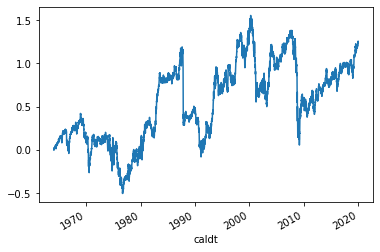

In [101]:
#get cumulative excess returns

import numpy as np
combined_strat['exret'] = np.log(combined_strat['exret']+1)
combined_strat.index = combined_strat.caldt
combined_strat = combined_strat['exret']
combined_strat.cumsum().plot()

<AxesSubplot:xlabel='caldt'>

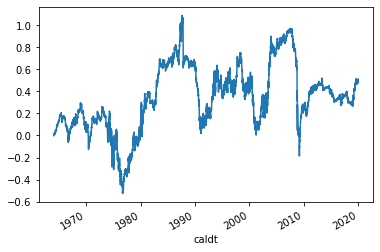

In [102]:
low_beta_strat = pl_ROB
low_beta_strat.index = low_beta_strat.caldt
low_beta_strat = low_beta_strat['exret_0']
low_beta_strat = np.log(low_beta_strat+1)
low_beta_strat.cumsum().plot()

<AxesSubplot:xlabel='caldt'>

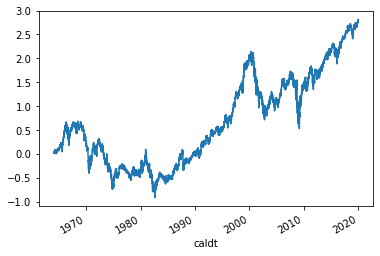

In [103]:
high_beta_strat = pl_ROB
high_beta_strat.index = high_beta_strat.caldt
high_beta_strat = high_beta_strat['exret_9']
high_beta_strat = np.log(high_beta_strat+1)
high_beta_strat.cumsum().plot()

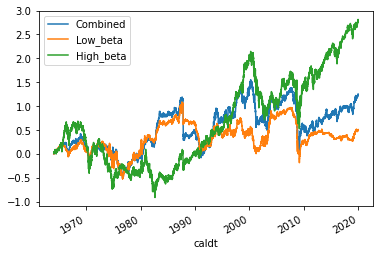

In [104]:
import matplotlib.pyplot as plt
combined_strat.cumsum().plot(label='Combined')
low_beta_strat.cumsum().plot(label='Low_beta')
high_beta_strat.cumsum().plot(label='High_beta')
plt.legend(loc="upper left")

In [105]:
#get sharpe ratios

In [106]:
def my_rolling_sharpe(y):
    return np.sqrt(252) * (y.mean() / y.std()) # 21 days per month X 12 months = 252

In [107]:
combined_strat = pd.concat([mac_ann_strat,mac_ann_strat2]).sort_values(by='caldt').reset_index(drop=True)
combined_strat.index = combined_strat.caldt
combined_strat = combined_strat['exret']

low_beta_strat = pl_ROB
low_beta_strat.index = low_beta_strat.caldt
low_beta_strat = low_beta_strat['exret_0']

high_beta_strat = pl_ROB
high_beta_strat.index = high_beta_strat.caldt
high_beta_strat = high_beta_strat['exret_9']

In [108]:
combined_strat_SR = combined_strat.rolling(252).apply(my_rolling_sharpe)
low_beta_strat_SR = low_beta_strat.rolling(252).apply(my_rolling_sharpe)
high_beta_strat_SR = high_beta_strat.rolling(252).apply(my_rolling_sharpe)

<AxesSubplot:xlabel='caldt'>

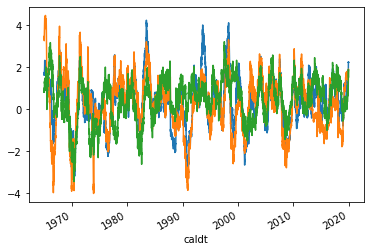

In [109]:
ax = combined_strat_SR.plot()
low_beta_strat_SR.plot(ax=ax)
high_beta_strat_SR.plot(ax=ax)

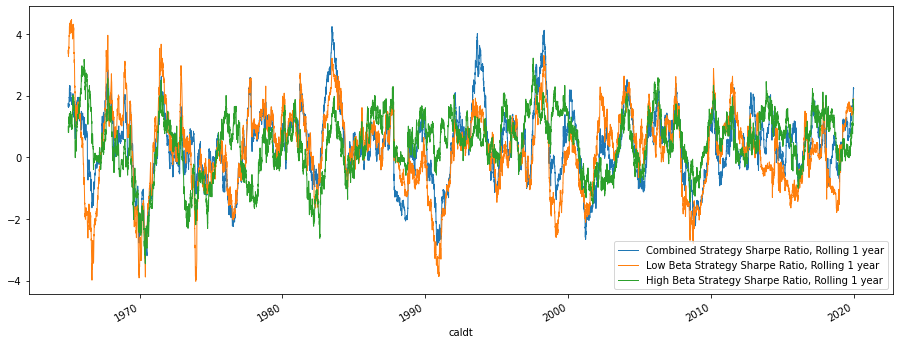

In [110]:
ax = plt.axes([0, 0.6, 2, 1])
ax = combined_strat_SR.plot(label='Combined Strategy Sharpe Ratio, Rolling 1 year', linewidth=1)
low_beta_strat_SR.plot(ax=ax, label='Low Beta Strategy Sharpe Ratio, Rolling 1 year', linewidth=1)
high_beta_strat_SR.plot(ax=ax, label='High Beta Strategy Sharpe Ratio, Rolling 1 year', linewidth=1)
plt.legend(loc="lower right")

In [111]:
#get rolling alphas

In [112]:
vw1_ROB.describe()[['exret_0','exret_9','beta_0','beta_9','exmkt']]

,exret_0,exret_9,beta_0,beta_9,exmkt
count,14097.000000,14097.000000,14097.000000,14097.000000,14097.000000
mean,0.000089,0.000341,0.152883,1.553884,0.000257
std,0.010302,0.016863,0.195362,0.225647,0.009843
min,-0.179705,-0.195915,-0.510317,1.155506,-0.174400
25%,-0.003496,-0.007957,0.003841,1.386765,-0.004100
50%,0.000058,0.000463,0.156163,1.535486,0.000500
75%,0.003587,0.008735,0.294172,1.684715,0.004900
max,0.198345,0.168006,0.653243,2.583842,0.113500


In [113]:
pl1_ROB = vw1_ROB[['caldt','exret_0','exret_9','beta_0','beta_9','exmkt']]
pl1_ROB

,caldt,exret_0,exret_9,beta_0,beta_9,exmkt
0,1964-01-02,-0.001658,0.018244,0.309860,1.543780,0.0060
1,1964-01-03,0.003496,0.003085,0.299338,1.543114,0.0017
2,1964-01-06,0.004186,0.000920,0.295397,1.545034,0.0023
3,1964-01-07,0.001369,-0.001204,0.296277,1.544361,0.0004
4,1964-01-08,0.000954,0.007457,0.295729,1.543757,0.0034
...,...,...,...,...,...,...
14092,2019-12-24,0.006975,0.004672,-0.091524,1.500278,0.0001
14093,2019-12-26,0.005333,0.003808,-0.093371,1.501437,0.0048
14094,2019-12-27,-0.003021,-0.008328,-0.092467,1.500451,-0.0010
14095,2019-12-30,0.005502,-0.014197,-0.092090,1.504038,-0.0057


In [114]:
temp = pl1_ROB[pl1_ROB.caldt.isin(a_2)][['caldt','exret_9','beta_9','exmkt']].rename(columns={'exret_9':'exret','beta_9':'beta'})
temp

,caldt,exret,beta,exmkt
5,1964-01-09,0.004164,1.544637,0.0030
6,1964-01-10,-0.002778,1.544475,-0.0004
7,1964-01-13,0.005671,1.544458,-0.0010
18,1964-01-28,-0.004168,1.533739,-0.0001
19,1964-01-29,-0.010331,1.534013,-0.0058
...,...,...,...,...
14081,2019-12-09,-0.002789,1.451281,-0.0033
14082,2019-12-10,0.000067,1.451400,-0.0008
14083,2019-12-11,0.003392,1.450904,0.0028
14084,2019-12-12,0.009438,1.451016,0.0090


In [115]:
temp2 = pl1_ROB[pl1_ROB.caldt.isin(n_2)][['caldt','exret_0','beta_0','exmkt']].rename(columns={'exret_0':'exret','beta_0':'beta'})
temp2

,caldt,exret,beta,exmkt
0,1964-01-02,-0.001658,0.309860,0.0060
1,1964-01-03,0.003496,0.299338,0.0017
2,1964-01-06,0.004186,0.295397,0.0023
3,1964-01-07,0.001369,0.296277,0.0004
4,1964-01-08,0.000954,0.295729,0.0034
...,...,...,...,...
14092,2019-12-24,0.006975,-0.091524,0.0001
14093,2019-12-26,0.005333,-0.093371,0.0048
14094,2019-12-27,-0.003021,-0.092467,-0.0010
14095,2019-12-30,0.005502,-0.092090,-0.0057


In [116]:
temp_combined = pd.concat([temp,temp2]).sort_values(by='caldt').reset_index(drop=True)
temp_combined

,caldt,exret,beta,exmkt
0,1964-01-02,-0.001658,0.309860,0.0060
1,1964-01-03,0.003496,0.299338,0.0017
2,1964-01-06,0.004186,0.295397,0.0023
3,1964-01-07,0.001369,0.296277,0.0004
4,1964-01-08,0.000954,0.295729,0.0034
...,...,...,...,...
14092,2019-12-24,0.006975,-0.091524,0.0001
14093,2019-12-26,0.005333,-0.093371,0.0048
14094,2019-12-27,-0.003021,-0.092467,-0.0010
14095,2019-12-30,0.005502,-0.092090,-0.0057


In [117]:
temp_combined.index = temp_combined.caldt
temp_combined = temp_combined[['exret','beta','exmkt']]
temp_combined

,exret,beta,exmkt
caldt,,,
1964-01-02,-0.001658,0.309860,0.0060
1964-01-03,0.003496,0.299338,0.0017
1964-01-06,0.004186,0.295397,0.0023
1964-01-07,0.001369,0.296277,0.0004
1964-01-08,0.000954,0.295729,0.0034
...,...,...,...
2019-12-24,0.006975,-0.091524,0.0001
2019-12-26,0.005333,-0.093371,0.0048
2019-12-27,-0.003021,-0.092467,-0.0010


In [118]:
temp_low_beta = pl1_ROB[['caldt','exret_0','beta_0','exmkt']].rename(columns={'exret_0':'exret','beta_0':'beta'})
temp_low_beta.index = temp_low_beta.caldt
temp_low_beta = temp_low_beta[['exret','beta','exmkt']]
temp_high_beta = pl1_ROB[['caldt','exret_9','beta_9','exmkt']].rename(columns={'exret_9':'exret','beta_9':'beta'})
temp_high_beta.index = temp_high_beta.caldt
temp_high_beta = temp_high_beta[['exret','beta','exmkt']]

In [119]:
combined_alpha = np.sqrt(252)* (temp_combined.exret - temp_combined.beta * temp_combined.exmkt)
low_beta_alpha = np.sqrt(252)* (temp_low_beta.exret - temp_low_beta.beta * temp_low_beta.exmkt)
high_beta_alpha = np.sqrt(252)* (temp_high_beta.exret - temp_high_beta.beta * temp_high_beta.exmkt)

In [120]:
combined_alpha_rolling = combined_alpha.rolling(252).mean()*100
low_beta_alpha_rolling = low_beta_alpha.rolling(252).mean()*100
high_beta_alpha_rolling = high_beta_alpha.rolling(252).mean()*100

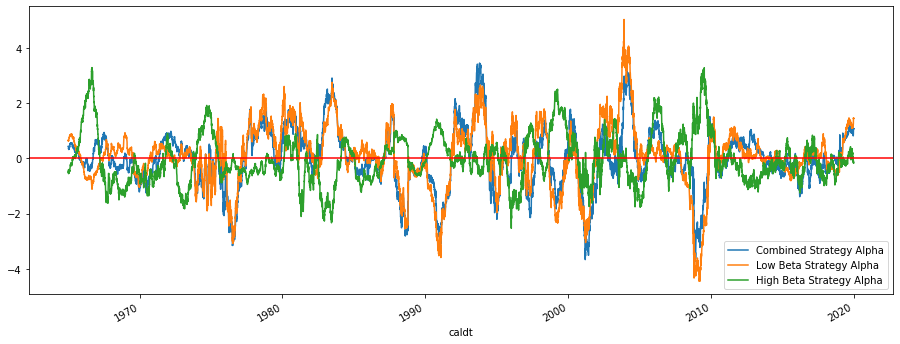

In [121]:
ax = plt.axes([0, 0.6, 2, 1])
ax = combined_alpha_rolling.plot(label='Combined Strategy Alpha')
low_beta_alpha_rolling.plot(ax=ax, label='Low Beta Strategy Alpha')
high_beta_alpha_rolling.plot(ax=ax, label='High Beta Strategy Alpha')
plt.legend(loc="lower right")
plt.axhline(y=0, color='r', linestyle='-')

In [122]:
combined_alpha_rolling = combined_alpha_rolling[(combined_alpha_rolling.index >= '2010-01-01') & (combined_alpha_rolling.index < '2020-01-01')]
low_beta_alpha_rolling = low_beta_alpha_rolling[(low_beta_alpha_rolling.index >= '2010-01-01') & (low_beta_alpha_rolling.index < '2020-01-01')]
high_beta_alpha_rolling = high_beta_alpha_rolling[(high_beta_alpha_rolling.index >= '2010-01-01') & (high_beta_alpha_rolling.index < '2020-01-01')]

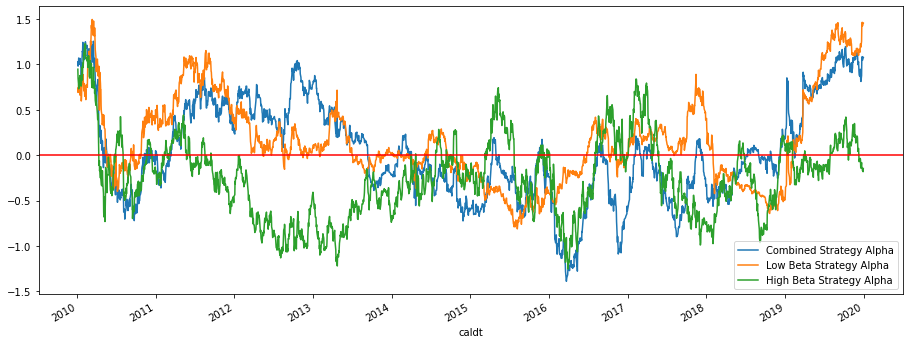

In [123]:
ax = plt.axes([0, 0.6, 2, 1])
ax = combined_alpha_rolling.plot(label='Combined Strategy Alpha')
low_beta_alpha_rolling.plot(ax=ax, label='Low Beta Strategy Alpha')
high_beta_alpha_rolling.plot(ax=ax, label='High Beta Strategy Alpha')
plt.legend(loc="lower right")
plt.axhline(y=0, color='r', linestyle='-')

In [124]:
# Get more Sharpe Ratios

In [125]:
market = vw1_ROB[['caldt','exmkt']]
market = market.sort_values(by='caldt')
market = market.reset_index(drop=True)
market.index = market.caldt
del market['caldt']
market

,exmkt
caldt,
1964-01-02,0.0060
1964-01-03,0.0017
1964-01-06,0.0023
1964-01-07,0.0004
1964-01-08,0.0034
...,...
2019-12-24,0.0001
2019-12-26,0.0048
2019-12-27,-0.0010


In [126]:
market_SR = market.rolling(252).apply(my_rolling_sharpe)
market_SR = market_SR[(market_SR.index >= '2010-01-01') & (market_SR.index < '2020-01-01')]
market_SR

,exmkt
caldt,
2010-01-04,0.996396
2010-01-05,1.018174
2010-01-06,0.991344
2010-01-07,1.122152
2010-01-08,1.117028
...,...
2019-12-24,2.286188
2019-12-26,2.093569
2019-12-27,2.028726


In [127]:
# Get high beta returns on a-days
original1 = pl_ROB[pl_ROB.caldt.isin(a_days_ROB.caldt)][['caldt','exret_9']].rename(columns={'exret_9':'exret'})
del original1['caldt']
original1

,exret
caldt,
1964-01-10,-0.002778
1964-01-29,-0.010331
1964-02-07,0.003969
1964-02-27,-0.005743
1964-03-04,-0.005905
...,...
2019-11-01,0.022969
2019-11-14,-0.005110
2019-12-06,0.011374


In [128]:
# Get low beta returns on n-days
original2 = pl_ROB[pl_ROB.caldt.isin(n_days_ROB.caldt)][['caldt','exret_0']].rename(columns={'exret_0':'exret'})
del original2['caldt']
original2

,exret
caldt,
1964-01-02,-0.001658
1964-01-03,0.003496
1964-01-06,0.004186
1964-01-07,0.001369
1964-01-08,0.000954
...,...
2019-12-24,0.006975
2019-12-26,0.005333
2019-12-27,-0.003021


In [129]:
original3 = pd.concat([original1,original2]).sort_values(by='caldt')
original3 = original3.rename(columns={'exret':'exret_original'})
original3

,exret_original
caldt,
1964-01-02,-0.001658
1964-01-03,0.003496
1964-01-06,0.004186
1964-01-07,0.001369
1964-01-08,0.000954
...,...
2019-12-24,0.006975
2019-12-26,0.005333
2019-12-27,-0.003021


In [130]:
original3_SR = original3.rolling(252).apply(my_rolling_sharpe)

In [131]:
original3_SR = original3_SR[(original3_SR.index >= '2010-01-01') & (original3_SR.index < '2020-01-01')]
combined_strat_SR = combined_strat_SR[(combined_strat_SR.index >= '2010-01-01') & (combined_strat_SR.index < '2020-01-01')]
low_beta_strat_SR = low_beta_strat_SR[(low_beta_strat_SR.index >= '2010-01-01') & (low_beta_strat_SR.index < '2020-01-01')]
high_beta_strat_SR = high_beta_strat_SR[(high_beta_strat_SR.index >= '2010-01-01') & (high_beta_strat_SR.index < '2020-01-01')]

In [132]:
PLOT = pd.concat([market_SR, original3_SR, combined_strat_SR, low_beta_strat_SR, high_beta_strat_SR], axis=1)
PLOT = PLOT.resample('Y').mean()
PLOT = PLOT.rename(columns={'exret_9':'high_beta', 'exret_0':'low_beta','exret':'combined_robust', 'exret_original':'combined', 'exmkt':'market'})
PLOT['date'] = PLOT.index.year
PLOT.index = PLOT.date
del PLOT['date']
PLOT

,market,combined,combined_robust,low_beta,high_beta
date,,,,,
2010,1.197452,1.329425,0.196723,0.927290,1.053277
2011,0.856217,1.102045,0.592389,1.480718,0.782768
2012,0.635238,1.489831,0.567894,0.490764,0.268541
2013,1.760988,0.415636,0.667796,0.055048,1.169226
2014,1.657174,0.640638,0.690107,-0.240937,1.199778
2015,0.718057,-0.559328,0.472513,-0.989857,0.606028
2016,0.245780,-0.055933,0.043386,-0.166981,0.047372
2017,2.060385,0.778507,0.961068,0.440917,1.435428
2018,1.275002,-0.611454,-0.072898,-0.980437,0.961311


<AxesSubplot:xlabel='date'>

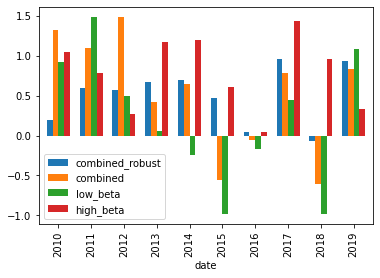

In [133]:
# AVERAGE SHARPE RATIO BY YEAR (2010-2019) for ROBUST combined strat
PLOT.plot(y=['combined_robust', 'combined','low_beta','high_beta'], kind='bar', width=0.7)

<AxesSubplot:xlabel='date'>

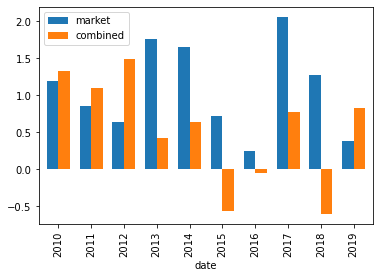

In [134]:
# AVERAGE SHARPE RATIO BY YEAR (2010-2019) for ROBUST combined strat
PLOT.plot(y=['market', 'combined'], kind='bar', width=0.7)

<AxesSubplot:xlabel='date'>

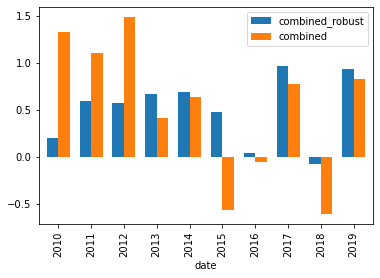

In [135]:
# AVERAGE SHARPE RATIO BY YEAR (2010-2019) for ROBUST combined strat
PLOT.plot(y=['combined_robust', 'combined'], kind='bar', width=0.7)

In [136]:
original3_SR.describe()

,exret_original
count,2516.000000
mean,0.535488
std,0.866960
min,-1.714861
25%,-0.196959
50%,0.634402
75%,1.142816
max,2.953781


In [137]:
combined_strat_SR.describe()

count    2516.000000
mean        0.504813
std         0.663991
min        -0.937569
25%         0.010613
50%         0.471724
75%         0.966089
max         2.259075
Name: exret, dtype: float64